
# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations. 

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics. 

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [1]:
# this will help in making the Python code more structured automatically (help adhere to good coding practices)


import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)




In [2]:

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split


# To build linear model for statistical analysis and prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

# To get diferent metric scores
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_curve, confusion_matrix, roc_auc_score


# this will help in making the Python code more structured automatically (good coding practice)


## Import Dataset

In [3]:
#importing the dataset 
hotel_data = pd.read_csv("C:/Users/Cooldream/Downloads/Phython/CLassification/INNHotelsGroup.csv")


## Data Overview

- Observations
- Sanity checks

In [4]:
#Shape of Dataframe
hotel_data.shape

(36275, 19)

In [5]:
#Summary of Dataframe
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

Observations:
    
1. The data consists of 19 columns and 36275 rows. 
2. The data has 14 numerical columns with one as type (float) and 13 as type (int).
3. The data has 5 objects which means the presence of 5 'categorical' columns.
4. All the columns of database show 36275 non-null values which indicate no data is missing from any columns.

In [6]:
#First 5 rows
hotel_data.head()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0            65.00000   
1                                     0           106.68000   
2                                     0            60.00000   
3                                     0           100.00000   
4                                     0            94.50000   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

In [7]:
#Lat 5 rows
hotel_data.tail()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
36270   INN36271             3               0                     2   
36271   INN36272             2               0                     1   
36272   INN36273             2               0                     2   
36273   INN36274             2               0                     0   
36274   INN36275             2               0                     1   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
36270                  6       Meal Plan 1                           0   
36271                  3       Meal Plan 1                           0   
36272                  6       Meal Plan 1                           0   
36273                  3      Not Selected                           0   
36274                  2       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
36270        Room_Type 4         85          2018              8   
36271        Room_Type 1        228          2018             10   
36272        Room_Type 1        148          2018              7   
36273        Room_Type 1         63          2018              4   
36274        Room_Type 1        207          2018             12   

       arrival_date market_segment_type  repeated_guest  \
36270             3              Online               0   
36271            17              Online               0   
36272             1              Online               0   
36273            21              Online               0   
36274            30             Offline               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
36270                             0                                     0   
36271                             0                                     0   
36272                             0                                     0   
36273                             0                                     0   
36274                             0                                     0   

       avg_price_per_room  no_of_special_requests booking_status  
36270           167.80000                       1   Not_Canceled  
36271            90.95000                       2       Canceled  
36272            98.39000                       2   Not_Canceled  
36273            94.50000                       0       Canceled  
36274           161.67000                       0   Not_Canceled

In [8]:
#let drop the booking id from the data
df=hotel_data.drop(['Booking_ID'], axis = 1)

In [9]:
df.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

  type_of_meal_plan  required_car_parking_space room_type_reserved  lead_time  \
0       Meal Plan 1                           0        Room_Type 1        224   
1      Not Selected                           0        Room_Type 1          5   
2       Meal Plan 1                           0        Room_Type 1          1   
3       Meal Plan 1                           0        Room_Type 1        211   
4      Not Selected                           0        Room_Type 1         48   

   arrival_year  arrival_month  arrival_date market_segment_type  \
0          2017             10             2             Offline   
1          2018             11             6              Online   
2          2018              2            28              Online   
3          2018              5            20              Online   
4          2018              4            11              Online   

   repeated_guest  no_of_previous_cancellations  \
0               0                             0   
1               0                             0   
2               0                             0   
3               0                             0   
4               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0            65.00000   
1                                     0           106.68000   
2                                     0            60.00000   
3                                     0           100.00000   
4                                     0            94.50000   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

In [10]:
# Duplicate Values in Dataframe

df.duplicated().sum()
print('Total number of duplicate values are:', df.duplicated().sum())

df.duplicated().value_counts()

Total number of duplicate values are: 10275


False    26000
True     10275
dtype: int64

In [11]:
# Null Values in Dataframe
df.isna().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

Observation:

1. There are no duplicate or null values in the dataset.

In [12]:
#number of unique "type_of_meal_plan"
print("Unique type_of_meal_plan: ", df['type_of_meal_plan'].nunique())
df['type_of_meal_plan'].unique()


Unique type_of_meal_plan:  4


array(['Meal Plan 1', 'Not Selected', 'Meal Plan 2', 'Meal Plan 3'],
      dtype=object)

In [13]:
# unique "required_car_parking_space "
df['required_car_parking_space'].unique()

array([0, 1], dtype=int64)

In [14]:
#number of unique "room_type_reserved "
print("Unique room_type_reserved : ", df['room_type_reserved'].nunique())
df['room_type_reserved'].unique()


Unique room_type_reserved :  7


array(['Room_Type 1', 'Room_Type 4', 'Room_Type 2', 'Room_Type 6',
       'Room_Type 5', 'Room_Type 7', 'Room_Type 3'], dtype=object)

In [15]:
#number of unique "market_segment_type "
print("Unique market_segment_type  : ", df['market_segment_type'].nunique())
df['market_segment_type'].unique()


Unique market_segment_type  :  5


array(['Offline', 'Online', 'Corporate', 'Aviation', 'Complementary'],
      dtype=object)

Observations:
    
1. There are 4 distinct unique meal plans that can be ordered. 
2. There are 7 distinct room type that can be reserved 
3. The market segment type is designated in 5 different subtypes: Offline, Online, Corporate, Aviation and Complementary

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled? 
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

## Univariate Analysis

In [16]:
# statistical decription of the database
df.describe().T

count       mean      std  \
no_of_adults                         36275.00000    1.84496  0.51871   
no_of_children                       36275.00000    0.10528  0.40265   
no_of_weekend_nights                 36275.00000    0.81072  0.87064   
no_of_week_nights                    36275.00000    2.20430  1.41090   
required_car_parking_space           36275.00000    0.03099  0.17328   
lead_time                            36275.00000   85.23256 85.93082   
arrival_year                         36275.00000 2017.82043  0.38384   
arrival_month                        36275.00000    7.42365  3.06989   
arrival_date                         36275.00000   15.59700  8.74045   
repeated_guest                       36275.00000    0.02564  0.15805   
no_of_previous_cancellations         36275.00000    0.02335  0.36833   
no_of_previous_bookings_not_canceled 36275.00000    0.15341  1.75417   
avg_price_per_room                   36275.00000  103.42354 35.08942   
no_of_special_requests               36275.00000    0.61966  0.78624   

                                            min        25%        50%  \
no_of_adults                            0.00000    2.00000    2.00000   
no_of_children                          0.00000    0.00000    0.00000   
no_of_weekend_nights                    0.00000    0.00000    1.00000   
no_of_week_nights                       0.00000    1.00000    2.00000   
required_car_parking_space              0.00000    0.00000    0.00000   
lead_time                               0.00000   17.00000   57.00000   
arrival_year                         2017.00000 2018.00000 2018.00000   
arrival_month                           1.00000    5.00000    8.00000   
arrival_date                            1.00000    8.00000   16.00000   
repeated_guest                          0.00000    0.00000    0.00000   
no_of_previous_cancellations            0.00000    0.00000    0.00000   
no_of_previous_bookings_not_canceled    0.00000    0.00000    0.00000   
avg_price_per_room                      0.00000   80.30000   99.45000   
no_of_special_requests                  0.00000    0.00000    0.00000   

                                            75%        max  
no_of_adults                            2.00000    4.00000  
no_of_children                          0.00000   10.00000  
no_of_weekend_nights                    2.00000    7.00000  
no_of_week_nights                       3.00000   17.00000  
required_car_parking_space              0.00000    1.00000  
lead_time                             126.00000  443.00000  
arrival_year                         2018.00000 2018.00000  
arrival_month                          10.00000   12.00000  
arrival_date                           23.00000   31.00000  
repeated_guest                          0.00000    1.00000  
no_of_previous_cancellations            0.00000   13.00000  
no_of_previous_bookings_not_canceled    0.00000   58.00000  
avg_price_per_room                    120.00000  540.00000  
no_of_special_requests                  1.00000    5.00000

**Observations**:
    
1. Maximum number of adults who booked the room are 4 but usually hotel is booked for 2 adults
2. The median and 75% quartile is 0 for no_of_children.
3. The mean lead time is 85.23 days quite higher than median of 57 days.
4. The mean for avg_price_per_room is €103.42 quite close to €99.5 median.
5. The maximum avg_price_per_room is €540 quite higher than 75% quartile of €120. 
6. More than 75% of bookings have 0 as "no_of_previous_bookings_not_canceled" and "no_of_previous_cancellations"
7. The maximum number of bookings not cancelled by repeated guest is 58.
8. The maximum number of bookings cancelled by repeated guest is 13.
9. The median for no_of_week_nights is 2 and mean is 2.2.
10. The maximum no_of_week_nights bookings is 17 but more than 75% of bookings are less than 3. 
11. The maximum no_of_weekends_nights bookings is 7 but more than 75% is less than 2 bookings. 
12. Maximum number of special requests placed by customer is 5. 
13. More than 75% of values for arrival year is 2018. 

#### Plot the distribution plots for all the numerical features

In [17]:
# Histogram and boxplot for continuous numerical columns
def hist_box(data, column):
    
    #subplots of histogram and boxplot
    fig, (ax_hist, ax_box) = plt.subplots(2 , figsize = (13, 6), gridspec_kw={"height_ratios": (0.7, 0.3)})
    #plotting the title of graphs
    fig.suptitle(column)
    # plotting histogram 
    sns.histplot(data=data, x = column, ax=ax_hist, kde = True ) #plotting on first axis 
    
    #plotting mean line in histogram
    Mean=data[column].mean()
    ax_hist.axvline(x = Mean, color ='orange', linestyle="--") #plotting mean line on first axis
    
    #plotting Boxplot
    sns.boxplot(data = data, x=column, ax=ax_box, showfliers=True, color = 'yellow') #plotting on 2nd axis
    plt.show()


In [18]:
#Barplot for categorical columns 
def bar_plot(data, column): 
    
    plt.figure(figsize = (5,3))  
    plt.title( column , loc = 'center', fontsize = 13) # Plot title on top of plot

    # plot the countplot for distribution 
    sns.countplot(data = df, x = column, palette = 'Set2')
    plt.xticks(rotation=45)
    plt.show()
    
    print('************' *10)
    print(data[column].value_counts().head(6))


### Observations on lead time

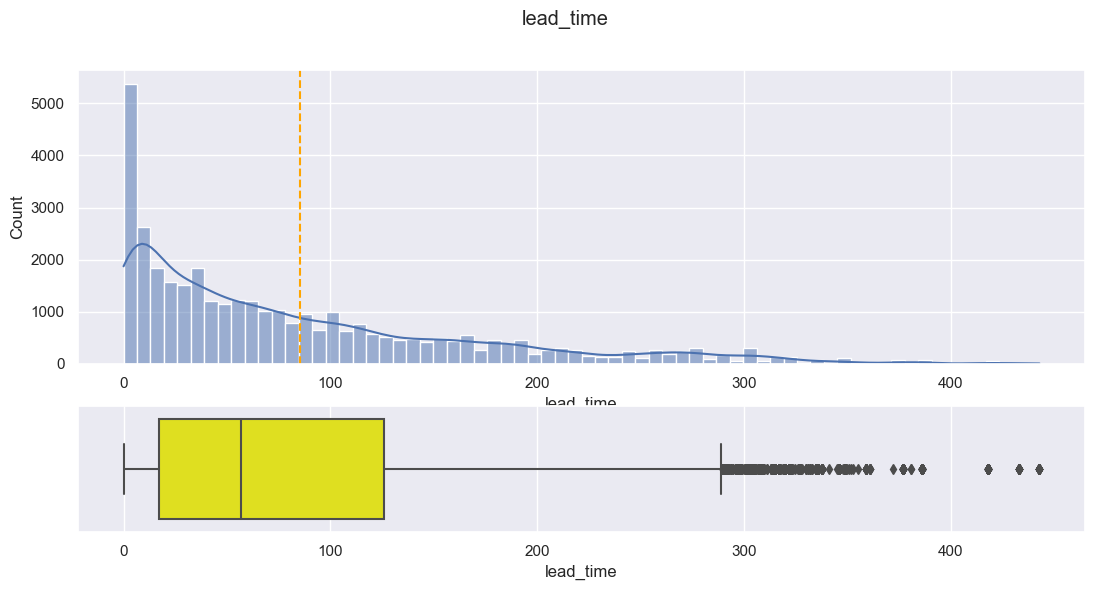

In [19]:
# Histogram and boxplot for "lead time"
hist_box(df, "lead_time")

In [20]:
df["lead_time"].value_counts().head(10)

0     1297
1     1078
2      643
3      630
4      628
5      577
6      519
8      436
7      429
12     412
Name: lead_time, dtype: int64

1. The data has right skewed 
2. There are outlier present on higher end of distribution.
3. The mean of lead time quite higher than median.

**Obervation**:

1. Atleast 1297 bookings were done on same day, and 1078 were booked one day before.
2. Maximum bookings are done within 140 days timeframe.

### Observations on average price per room

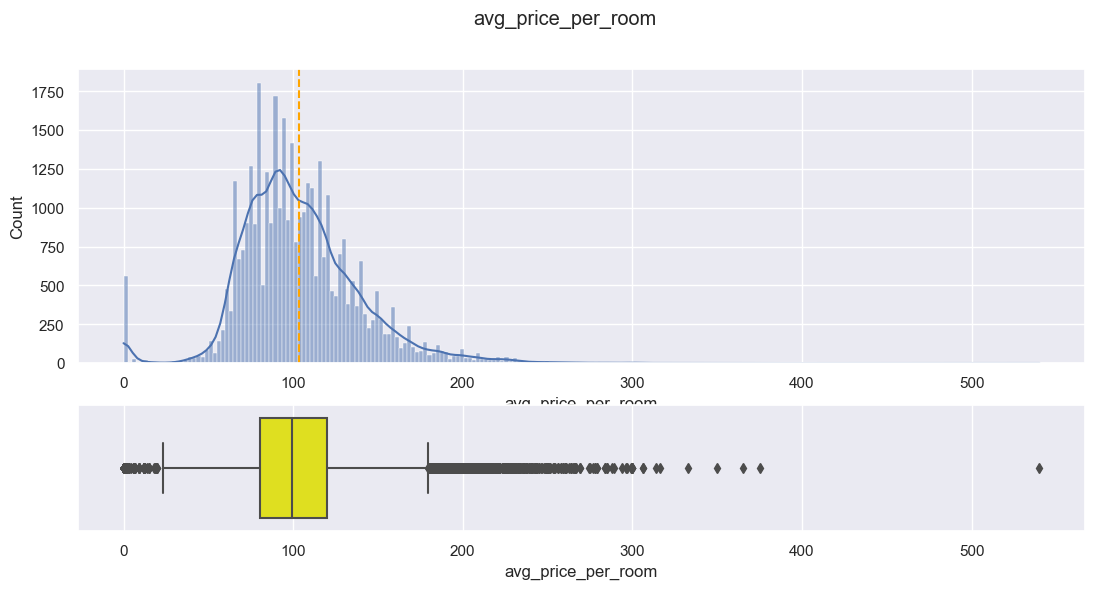

In [21]:
# Histogram and boxplot for "avg_price_per_room"
hist_box(df, "avg_price_per_room")

1. The data has right skewed 
2. There are outlier present on both sides of distribution.
3. The mean for avg_price_per_room is €103.42 quite close to €99.5 median.
4. The maximum avg_price_per_room of €540 is extreme outlier point in distribution. 

**Observation**:

1. The avg_price_per_room is 0 which need to be cross checked for validity.


In [22]:
df[df["avg_price_per_room"] == 0]

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
63                1               0                     0                  1   
145               1               0                     0                  2   
209               1               0                     0                  0   
266               1               0                     0                  2   
267               1               0                     2                  1   
...             ...             ...                   ...                ...   
35983             1               0                     0                  1   
36080             1               0                     1                  1   
36114             1               0                     0                  1   
36217             2               0                     2                  1   
36250             1               0                     0                  2   

      type_of_meal_plan  required_car_parking_space room_type_reserved  \
63          Meal Plan 1                           0        Room_Type 1   
145         Meal Plan 1                           0        Room_Type 1   
209         Meal Plan 1                           0        Room_Type 1   
266         Meal Plan 1                           0        Room_Type 1   
267         Meal Plan 1                           0        Room_Type 1   
...                 ...                         ...                ...   
35983       Meal Plan 1                           0        Room_Type 7   
36080       Meal Plan 1                           0        Room_Type 7   
36114       Meal Plan 1                           0        Room_Type 1   
36217       Meal Plan 1                           0        Room_Type 2   
36250       Meal Plan 2                           0        Room_Type 1   

       lead_time  arrival_year  arrival_month  arrival_date  \
63             2          2017              9            10   
145           13          2018              6             1   
209            4          2018              2            27   
266            1          2017              8            12   
267            4          2017              8            23   
...          ...           ...            ...           ...   
35983          0          2018              6             7   
36080          0          2018              3            21   
36114          1          2018              3             2   
36217          3          2017              8             9   
36250          6          2017             12            10   

      market_segment_type  repeated_guest  no_of_previous_cancellations  \
63          Complementary               0                             0   
145         Complementary               1                             3   
209         Complementary               0                             0   
266         Complementary               1                             0   
267         Complementary               0                             0   
...                   ...             ...                           ...   
35983       Complementary               1                             4   
36080       Complementary               1                             3   
36114              Online               0                             0   
36217              Online               0                             0   
36250              Online               0                             0   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
63                                        0             0.00000   
145                                       5             0.00000   
209                                       0             0.00000   
266                                       1             0.00000   
267                                       0             0.00000   
...                                     ...                 ...   
35983                         

In [23]:
df[df["avg_price_per_room"] == 0].market_segment_type.value_counts()

Complementary    354
Online           191
Name: market_segment_type, dtype: int64

In [24]:
df[df["avg_price_per_room"] >= 500]

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
33114             2               0                     0                  1   

      type_of_meal_plan  required_car_parking_space room_type_reserved  \
33114       Meal Plan 1                           0        Room_Type 1   

       lead_time  arrival_year  arrival_month  arrival_date  \
33114         35          2018              3            25   

      market_segment_type  repeated_guest  no_of_previous_cancellations  \
33114             Offline               0                             0   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
33114                                     0           540.00000   

       no_of_special_requests booking_status  
33114                       0       Canceled

In [25]:
#outlier treatment for > 500 

Q1 = df["avg_price_per_room"].quantile(0.25)  # 25th quantile
Q3 = df["avg_price_per_room"].quantile(0.75)  # 75th quantile
IQR = Q3 - Q1
Lower_Whisker = Q1 - 1.5 * IQR
Upper_Whisker = Q3 + 1.5 * IQR

**Observation**:

1. There 545 rows with avg_price_per_room as 0 euro. 
2. Out of 545 booking with 0 avg price 354 are complementary booking and 191 are online bookings.
3. Complementary bookings are usually free, 191 online bookings might be under some promotional offer.

In [26]:
# removing 500 by Upper_whisker
df.loc[df["avg_price_per_room"] >= 500, "avg_price_per_room"] = Upper_Whisker


### Observations on number of previous booking not canceled

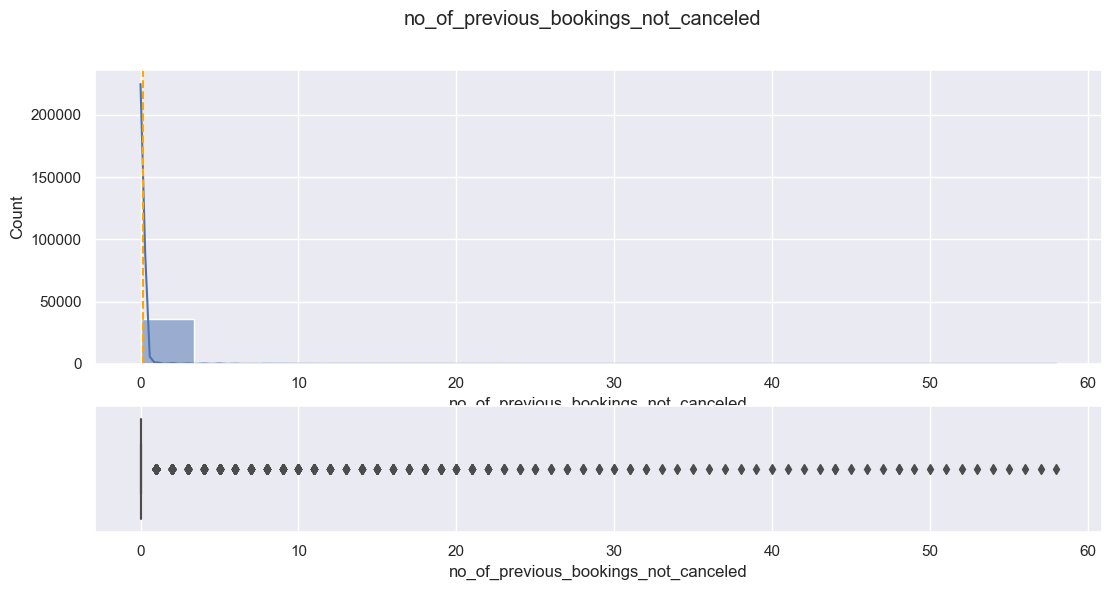

In [27]:
# Histogram and boxplot for "no_of_previous_bookings_not_canceled"
hist_box(df, "no_of_previous_bookings_not_canceled")

In [120]:
df["no_of_previous_bookings_not_canceled"] = 0

In [28]:
df_notcancelled = df[df["no_of_previous_bookings_not_canceled"] > 0]
df_notcancelled.shape

(812, 18)

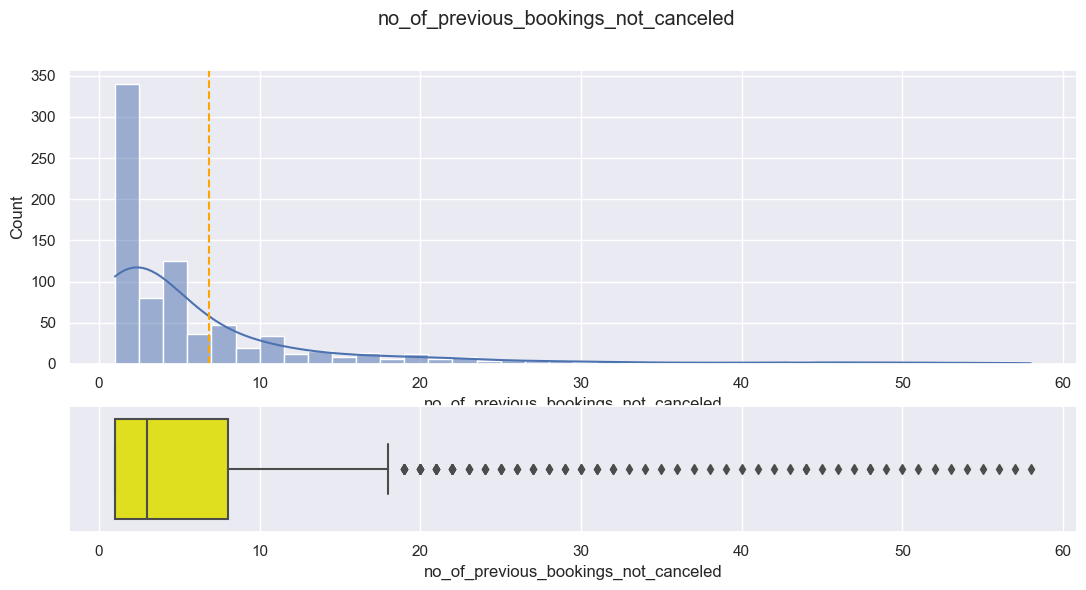

In [29]:
hist_box(df_notcancelled, "no_of_previous_bookings_not_canceled")

1. Both the plots are rightly skewed.
2. There are presence of outliers in both the plots.

**Observation**:
    
1. Atleast 812 were repeated customers who had booked before and not cancelled some bookings.
2. The 75% of guests of df_notcancelled has no_of_previous_bookings_not_canceled < 10. 

### Observations on number of previous booking cancellations

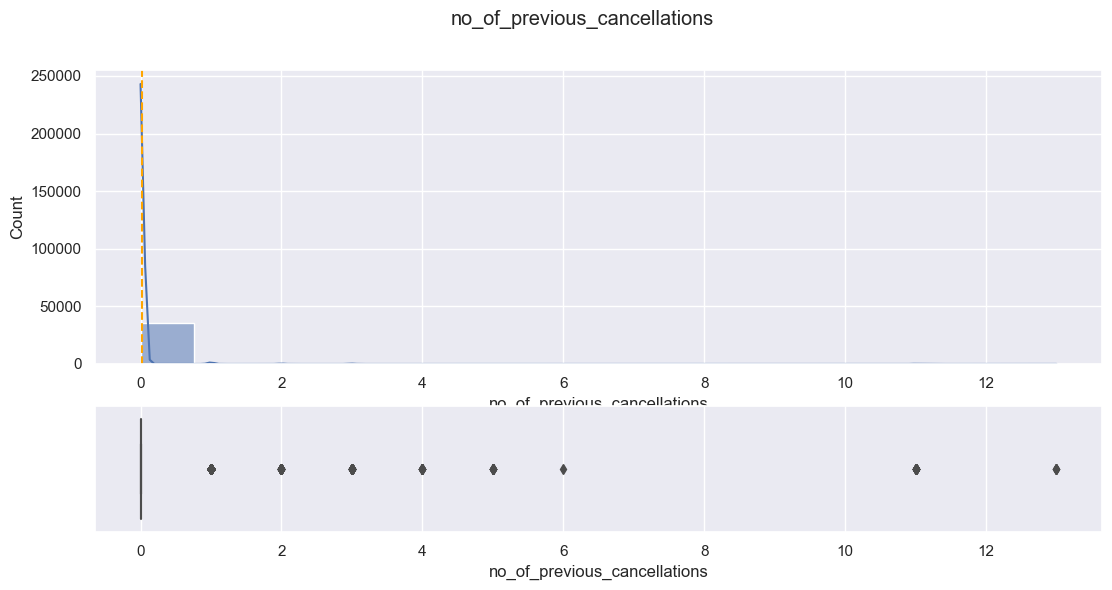

In [30]:
# Histogram and boxplot for "no_of_previous_cancellations"
hist_box(df, "no_of_previous_cancellations")

In [31]:
df_cancelled = df[df["no_of_previous_cancellations"] > 0]
df_cancelled.shape

(338, 18)

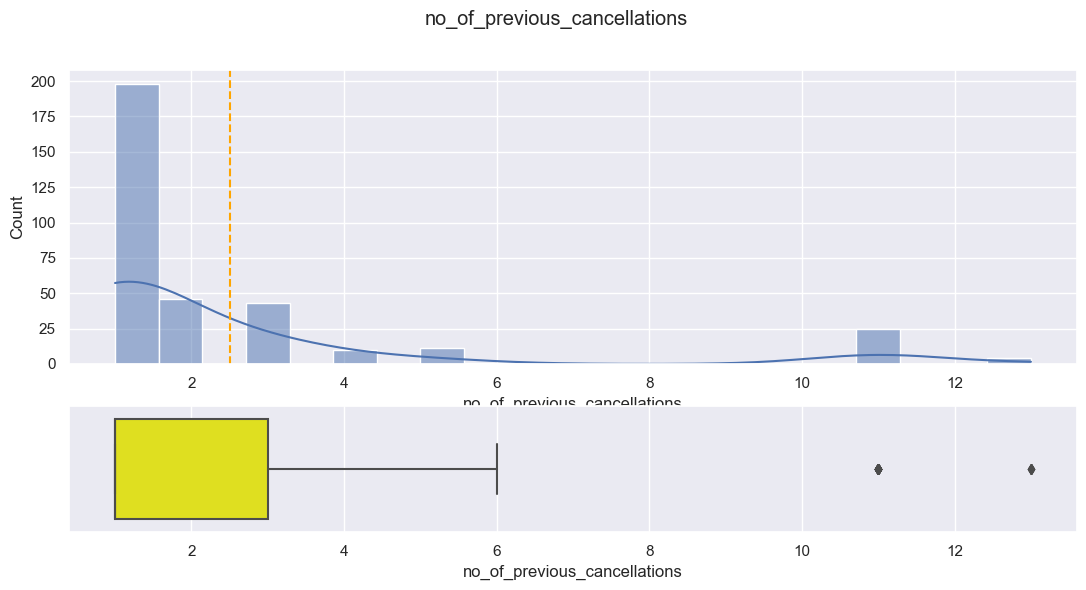

In [32]:
hist_box(df_cancelled, "no_of_previous_cancellations")

1. Both the plots are rightly skewed.
2. There are presence of outliers in both the plots.
3. More than 90% of booking has 0 as no_of_previous_cancellations. 

**Observation**:
    
1. Atleast 338 repeated customers who had booked before and cancelled some bookings.
2. More than 75% of cancellations of df_cancelled are less than 3 bookings. 

### Observations on number of adults

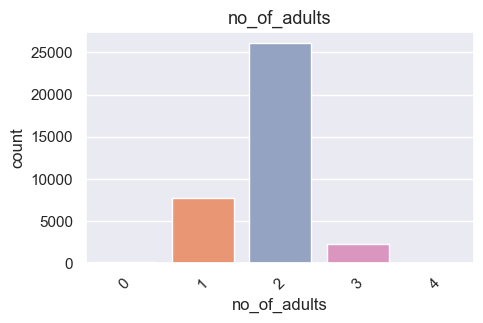

************************************************************************************************************************
2    26108
1     7695
3     2317
0      139
4       16
Name: no_of_adults, dtype: int64


In [33]:
bar_plot(df, "no_of_adults")

**Observations**:

1. Only 16 bookings out of 36275 are booked for 4 adult.
2. Most booking (atleast 26000) are done for 2 adults.
3. The number of bookings done for single adult is 7695
4. There are 139 bookings with 0 adults.

### Observations on number of children

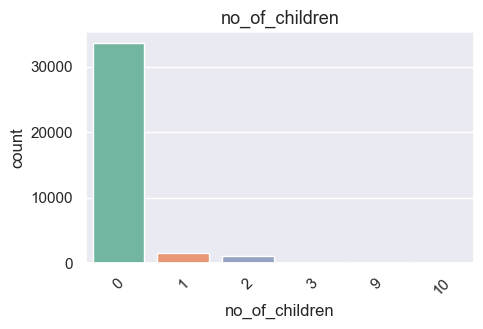

************************************************************************************************************************
0     33577
1      1618
2      1058
3        19
9         2
10        1
Name: no_of_children, dtype: int64


In [34]:
bar_plot(df, "no_of_children")

**Observations**:

1. There are 0 children for 33577 bookings out of 36275.
2. There are 1618 bookings with 1 child and 1058 with 2 children.
3. Only one booking is with 10 children and 2 bookings with 9 children.

In [35]:
# Replace the 3 datapoints of 9 and 10 children 
df['no_of_children']=df['no_of_children'].replace([9,10],3)

In [36]:
df['no_of_children'].unique()

array([0, 2, 1, 3], dtype=int64)

**Observation and Actions**:
    
1. More than 95% of bookings have no children.
2. The number of bookings with 3 or more children are only 21 in number.
3. Only 3 bookings are for more than 3 children, therefore could replace those bookings with 3 without creating much change in database. 
4. The unique solutions for number of children reduced from 6 to 4. 

### Observations on number of week nights

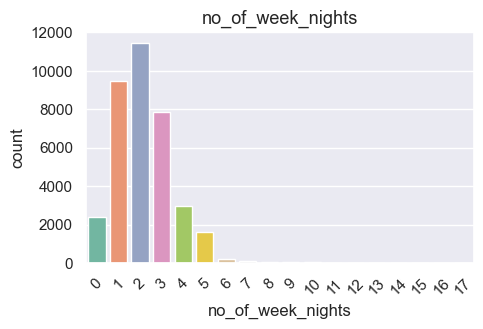

************************************************************************************************************************
2    11444
1     9488
3     7839
4     2990
0     2387
5     1614
Name: no_of_week_nights, dtype: int64


In [37]:
bar_plot(df, "no_of_week_nights")

**Observations**:
    
1. Most bookings are for 2 nights for no_of_week_nights.
2. The maximum no_of_week_night bookings is 17 but more than 75% is less than 3 for week nights.

### Observations on number of weekend nights

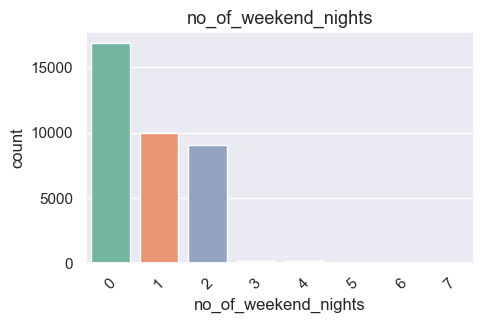

************************************************************************************************************************
0    16872
1     9995
2     9071
3      153
4      129
5       34
Name: no_of_weekend_nights, dtype: int64


In [38]:
bar_plot(df, "no_of_weekend_nights")

**Observations**:

1. Most bookings (more than 18000) are for 1 or 2 nights for no_of_weekend_nights.
2. The maximum no_of_weekend_night bookings is 7.
3. Atleast 16000 bookings are 0 for weekend nights which indicates are booked for week nights.

### Observations on required car parking space

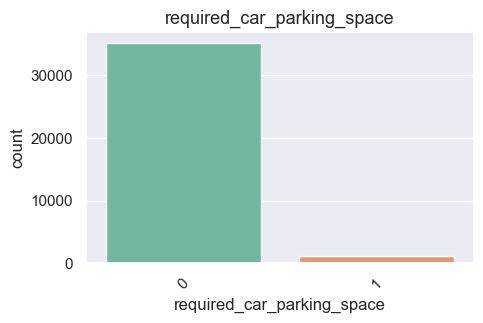

************************************************************************************************************************
0    35151
1     1124
Name: required_car_parking_space, dtype: int64


In [39]:
bar_plot(df, "required_car_parking_space")

**Observations**:
    
1. More than 95% of bookings required car parking space. 

### Observations on type of meal plan

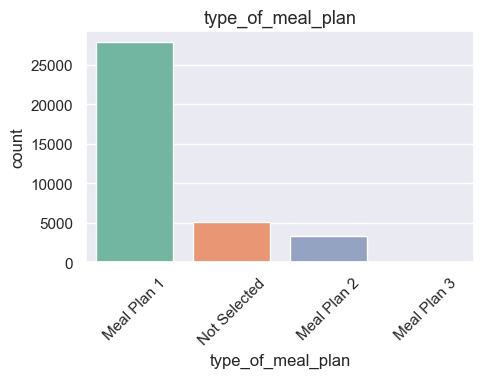

************************************************************************************************************************
Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64


In [40]:
bar_plot(df, "type_of_meal_plan")

**Observations**:
    
1. More than 27000 bookings have ordered Meal Plan 1, therefore is popular meal plan.
2. Atleast 5000 bookings have not selected any meal plan
3. A small number of 3310 bookings have ordered Meal plan 2 or 3. 

### Observations on room type reserved

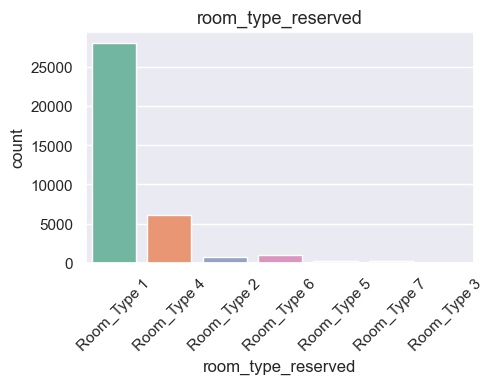

************************************************************************************************************************
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Name: room_type_reserved, dtype: int64


In [41]:
bar_plot(df, "room_type_reserved")

**Observations**:
    
1. Maximum room bookings is for Room type 1 around 28130.
2. Next popular room booking is room type 4 and account for 6057 bookings.
3. The room type 3 is least popular room for booking.

### Observations on number of special requests

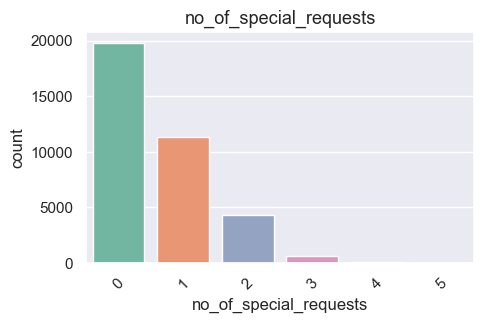

************************************************************************************************************************
0    19777
1    11373
2     4364
3      675
4       78
5        8
Name: no_of_special_requests, dtype: int64


In [42]:
bar_plot(df, "no_of_special_requests")

**Observations**:
    
1. More than 50% of bookings have no special requests.
2. Atleast one third of bookings have one special requests.
3. Atleast 8 customers have place around 5 special requests for a booking. 

### Observations on market segment type

**Which market segment do most of the guests come from?**

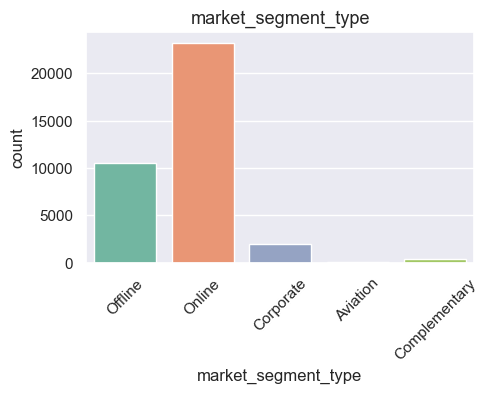

************************************************************************************************************************
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64


In [43]:
bar_plot(df, "market_segment_type")

**Observation**:
    
1. More than 60% of bookings for guests are done through online booking.
2. Atleast 10,000 bookings are done under offline segment.
3. Less than 3000 bookings are booked under rest of categories. 

### Observations on arrival month

**What are the busiest months in the hotel?**

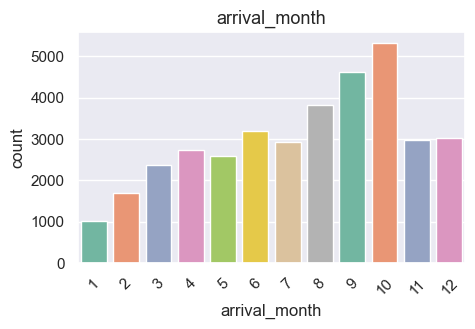

************************************************************************************************************************
10    5317
9     4611
8     3813
6     3203
12    3021
11    2980
Name: arrival_month, dtype: int64


In [44]:
bar_plot(df, "arrival_month")

**Observations**:
    
1. The maximum bookings (5317) around 14% are done for October month.
2. The top 6 months for bookings are June and from August - December.

### Observations on booking status

**What percentage of bookings are canceled?**

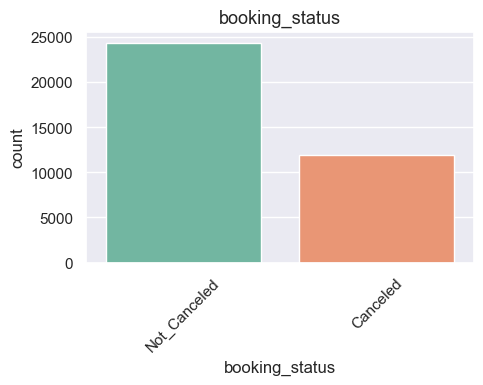

************************************************************************************************************************
Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64


In [45]:
bar_plot(df, "booking_status")

**Observations**:
    
1. Around 11885 (32% )of bookings are cancelled in this database.

## Bivariate Analysis

**Plot the correlation heatmap and pairplot**

In [46]:
#dropping arrival year date, and required car parking 
dftest = df.drop(['arrival_year','arrival_date','required_car_parking_space'], axis = 1)
dftest.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

  type_of_meal_plan room_type_reserved  lead_time  arrival_month  \
0       Meal Plan 1        Room_Type 1        224             10   
1      Not Selected        Room_Type 1          5             11   
2       Meal Plan 1        Room_Type 1          1              2   
3       Meal Plan 1        Room_Type 1        211              5   
4      Not Selected        Room_Type 1         48              4   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0            65.00000   
1                                     0           106.68000   
2                                     0            60.00000   
3                                     0           100.00000   
4                                     0            94.50000   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

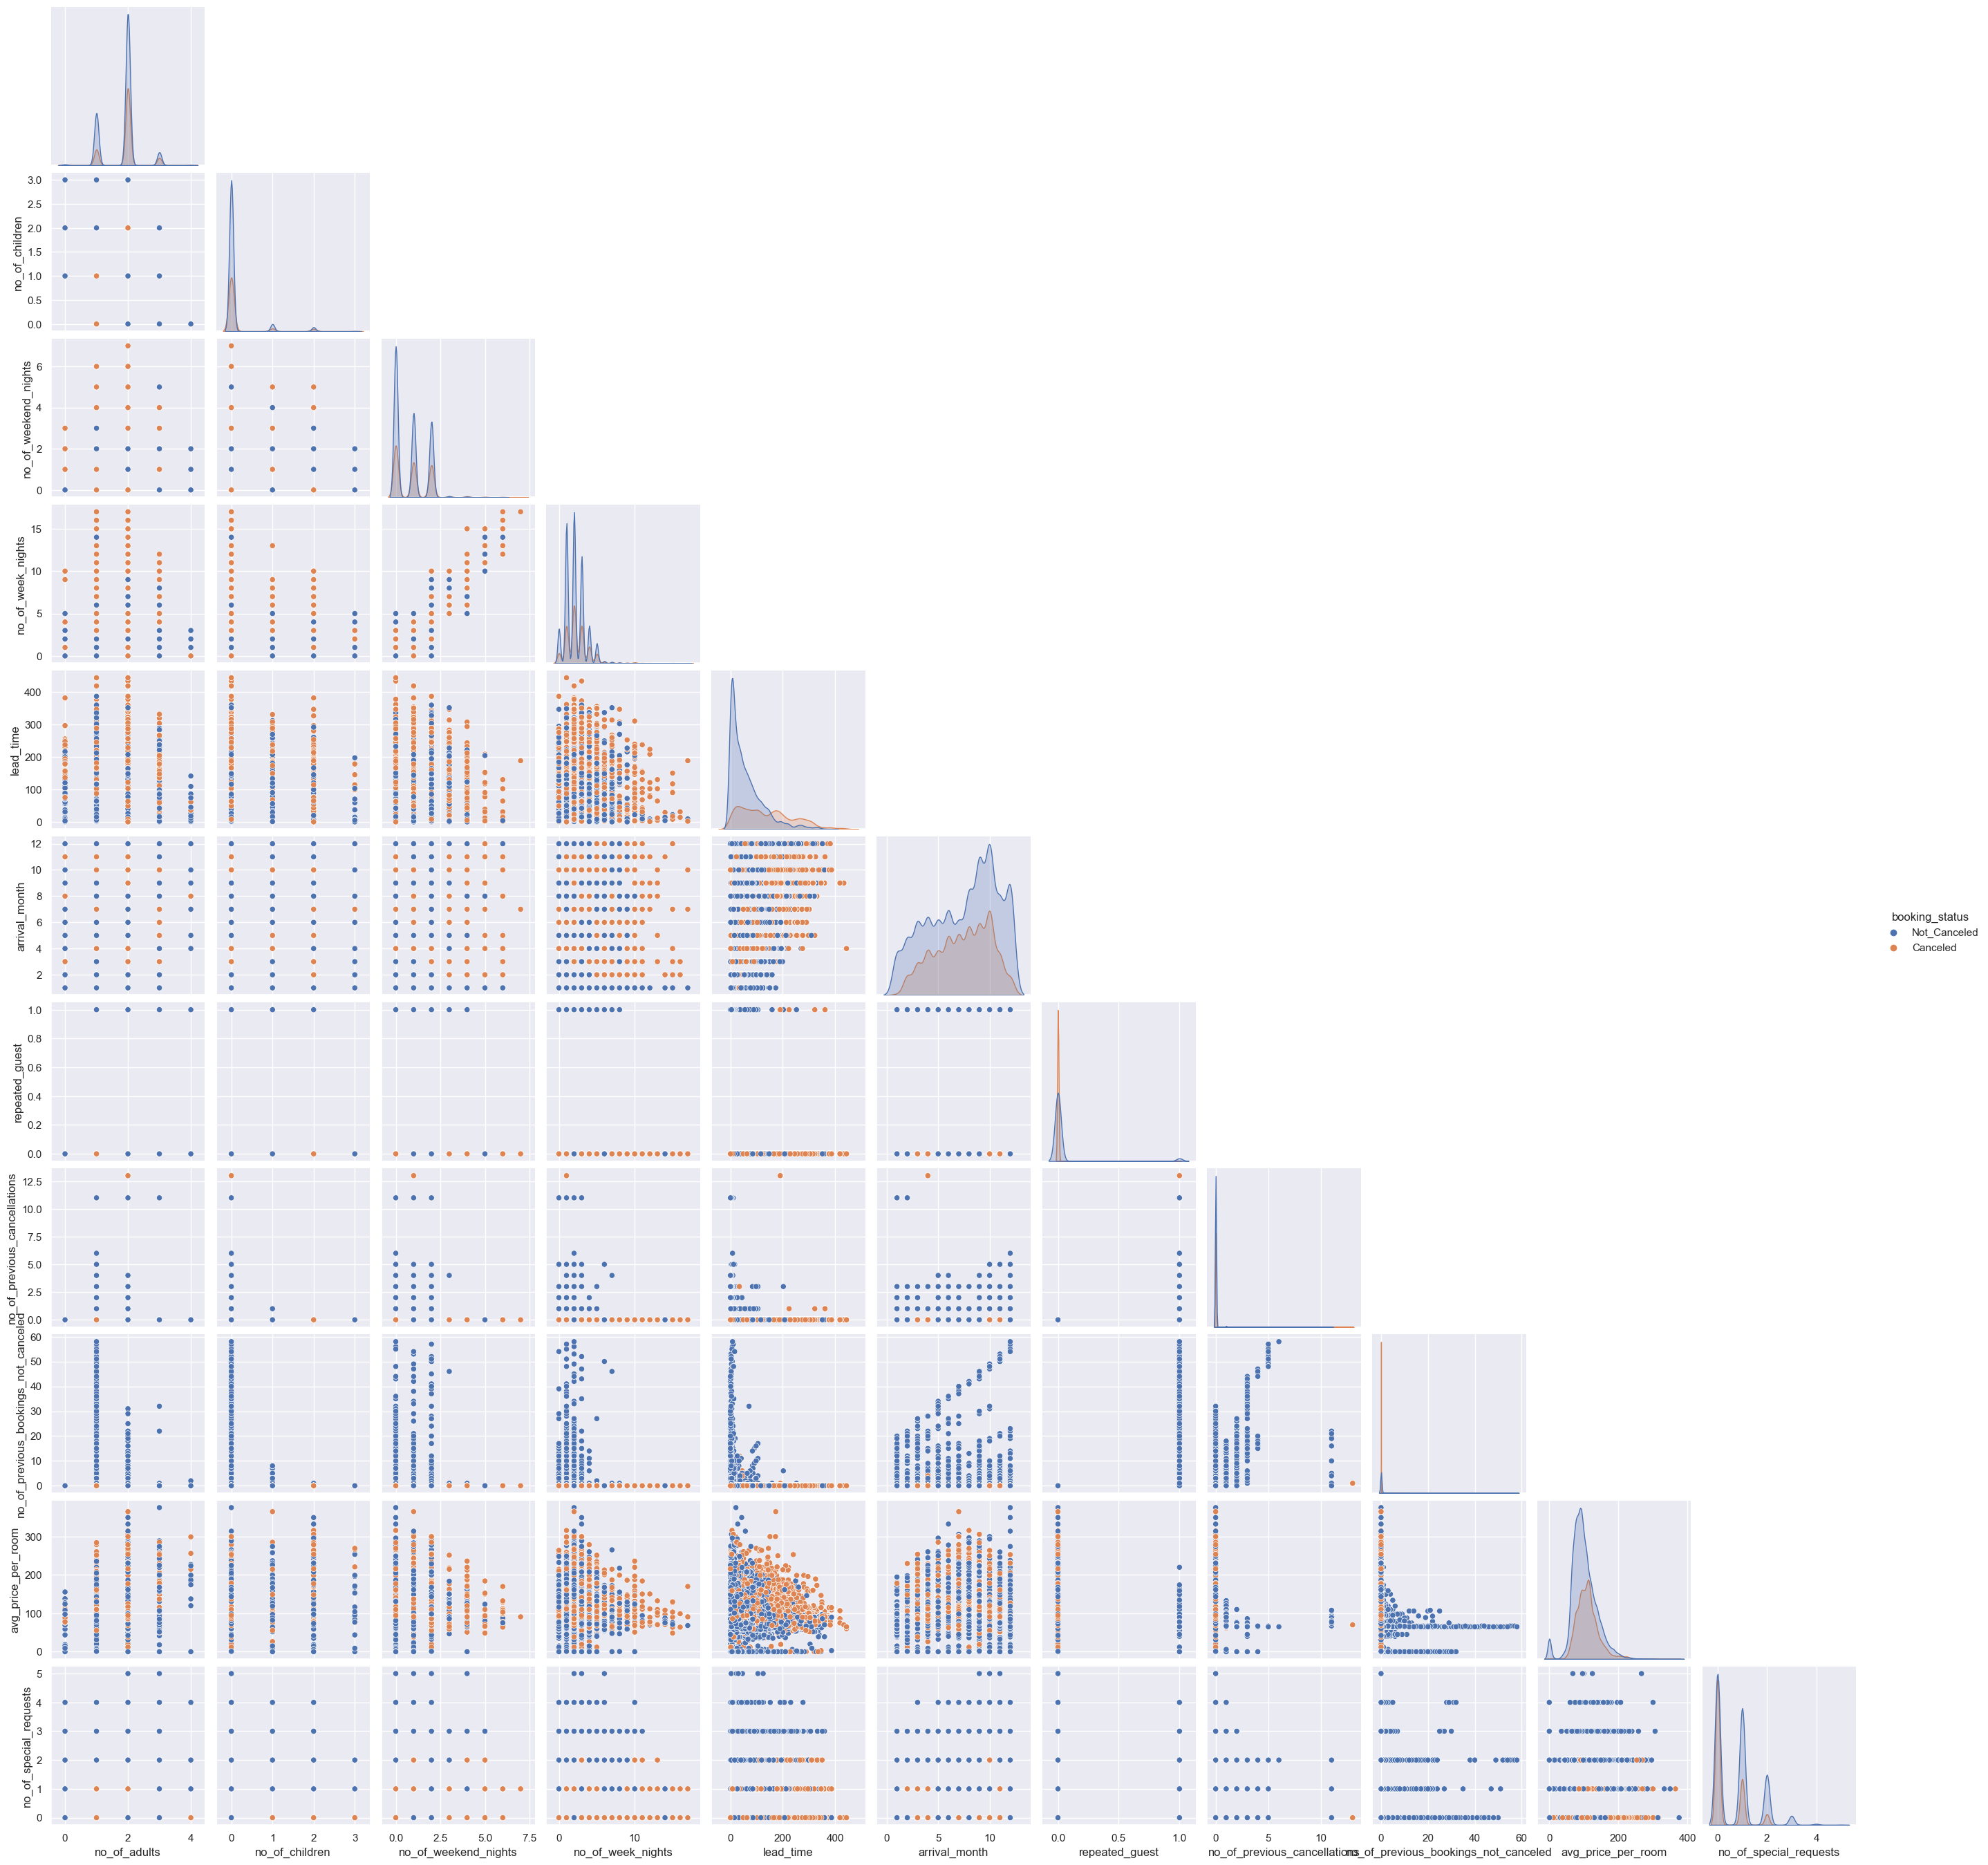

In [134]:
sns.pairplot(data=dftest, hue = "booking_status", corner = 'True')

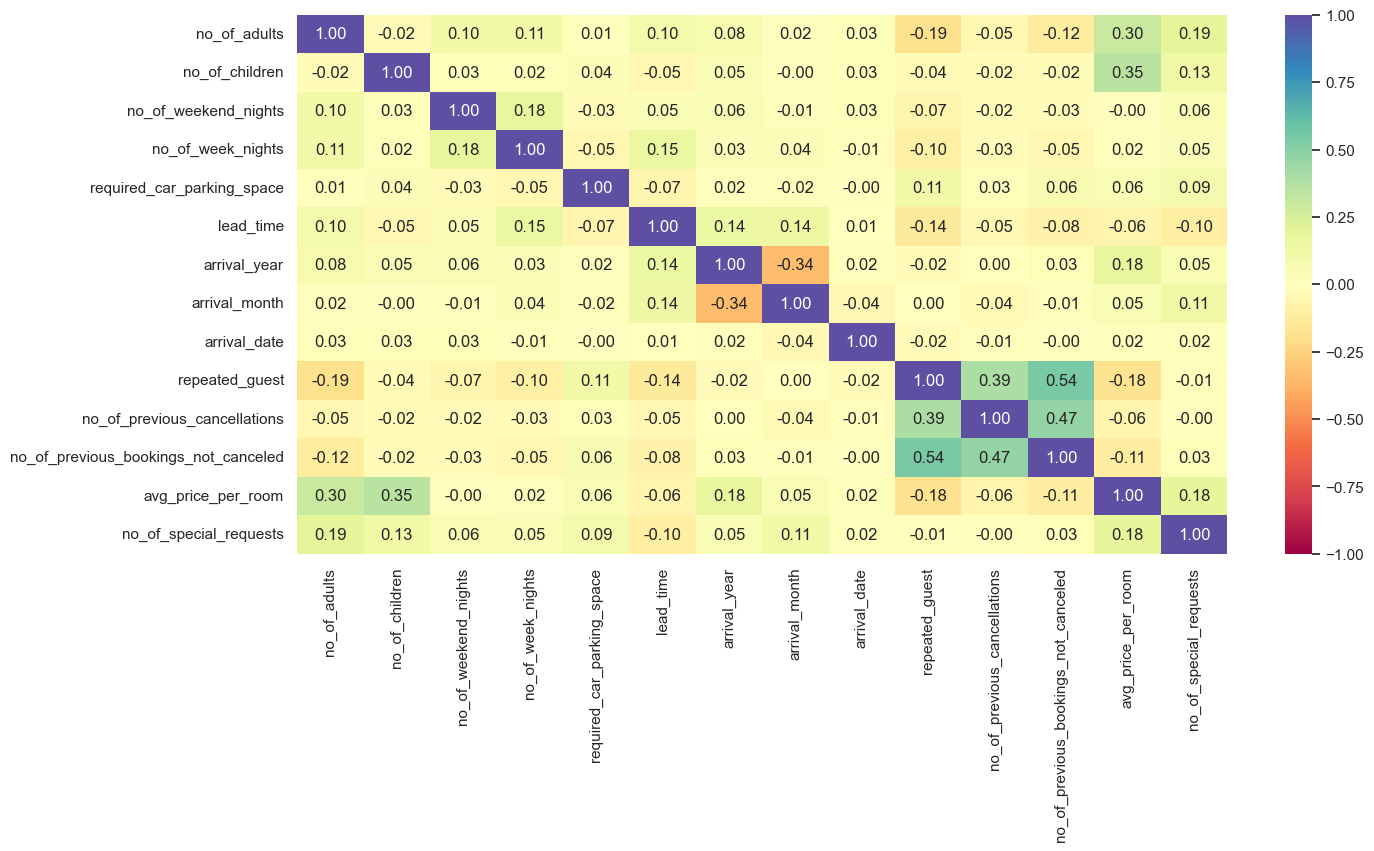

In [48]:
#calculate the correlation between the columns
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

**Observations**:
    
1. There are no visible patterns in different independent variables in pairplot.
2. The heatmap for correlation clearly shows low correlation coefficients for most variables.
3. The highest correlation coefficient around .47 between no_of_previous_cancellations and no_of_previous_not_cancelled.

In [49]:
# function for stacked barplot 
def stack_barplot(data, column, target):
    tab = pd.crosstab(data[column], data[target], margins = True)
    print(tab)
    pd.crosstab(data[column], data[target], normalize="index").plot(kind="bar", figsize=(7, 4), stacked=True)
    #plt.title(, fontsize = 10)
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.xticks(rotation=45);

In [50]:
### function to plot distributions wrt target

def dist_plot_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers)")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

**Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?**

### Booking_status vs Market_segment ###

booking_status       Canceled  Not_Canceled    All
market_segment_type                               
Aviation                   37            88    125
Complementary               0           391    391
Corporate                 220          1797   2017
Offline                  3153          7375  10528
Online                   8475         14739  23214
All                     11885         24390  36275


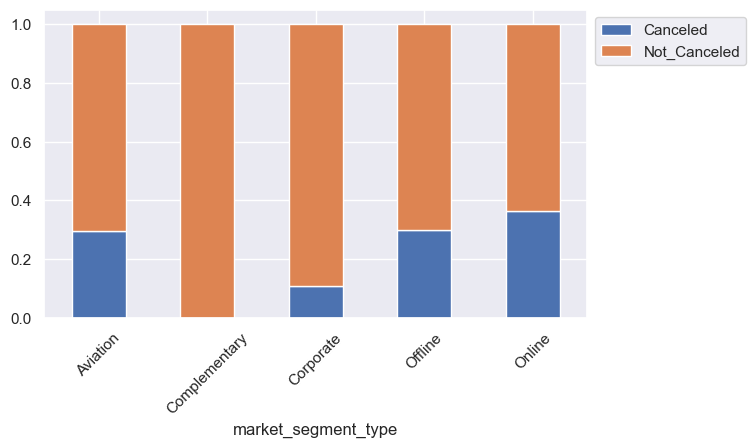

In [51]:
stack_barplot(df,"market_segment_type","booking_status")

**Observations**:
    
1. There are chances to have cancellations for corporate bookings is less than .2.
2. Complementary bookings are usually not at all cancelled.
3. The online booking has 35% chances of cancellation. 

**Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?**


### Booking_status vs Special_requests ###

booking_status          Canceled  Not_Canceled    All
no_of_special_requests                               
0                           8545         11232  19777
1                           2703          8670  11373
2                            637          3727   4364
3                              0           675    675
4                              0            78     78
5                              0             8      8
All                        11885         24390  36275


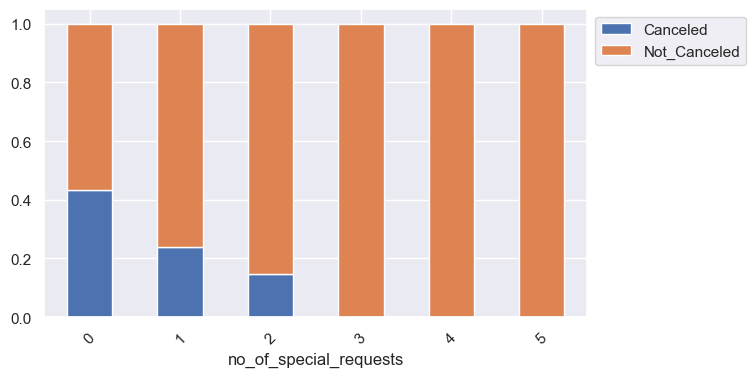

In [52]:
stack_barplot(df, "no_of_special_requests", "booking_status")

**Observations**:
    
1. The guest who have made 3 or more special requests and less likely to cancel the bookings.

**Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?**

### Repeated_guest vs Booking_status 

booking_status  Canceled  Not_Canceled    All
repeated_guest                               
0                  11869         23476  35345
1                     16           914    930
All                11885         24390  36275


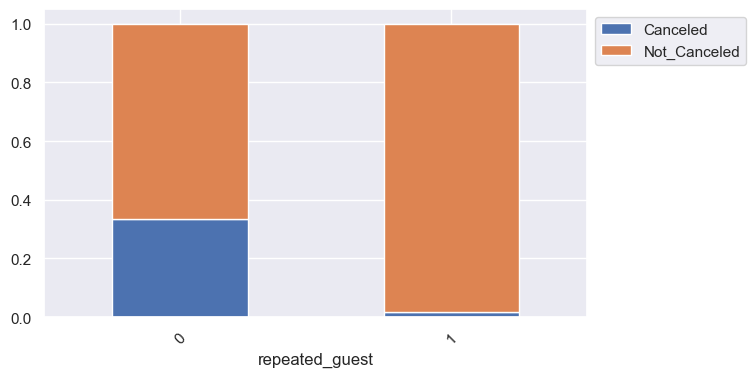

In [53]:
stack_barplot(df, "repeated_guest", "booking_status")

**Observations**:

1. The chances of cancellation from repeated guests is even less than .01%.


**Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?**

### Market_segment vs Avg_price per room ###

Median of avg_price : market_segment_type
Aviation         95.00000
Complementary     0.00000
Corporate        79.00000
Offline          90.00000
Online          107.10000
Name: avg_price_per_room, dtype: float64


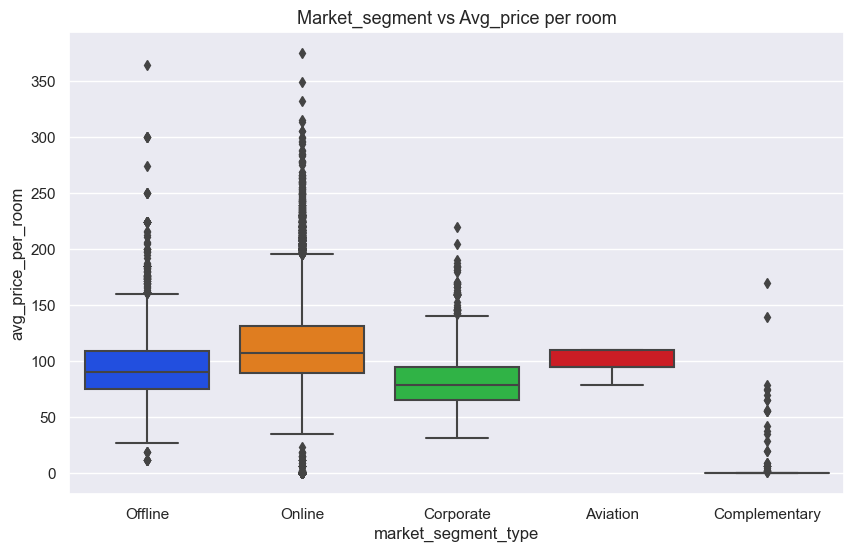

In [54]:
plt.figure(figsize=(10, 6))
plt.title('Market_segment vs Avg_price per room', fontsize = 13)
sns.boxplot(
    data=df, x="market_segment_type", y="avg_price_per_room", palette="bright")
plt.show

# lets group according to marketsegment and calculate median for avg price
print ('Median of avg_price :', df.groupby(['market_segment_type']).avg_price_per_room.median())

**Observations**:
    
1. The avg_price_per_room for complementary segment is quite low with median of 0 euro.
2. The median for avg_price_per_room for offline and aviation booking are quite close around 90-95 euros.
3. The maximum avg_price per room is capped for corporate and aviation segment.
4. The median price for online booking is 107 euro.

### Special_requests vs Avg_price per room ###

Median of avg_price : no_of_special_requests
0    95.00000
1   103.00000
2   114.40000
3   116.10000
4   120.00000
5    96.60000
Name: avg_price_per_room, dtype: float64


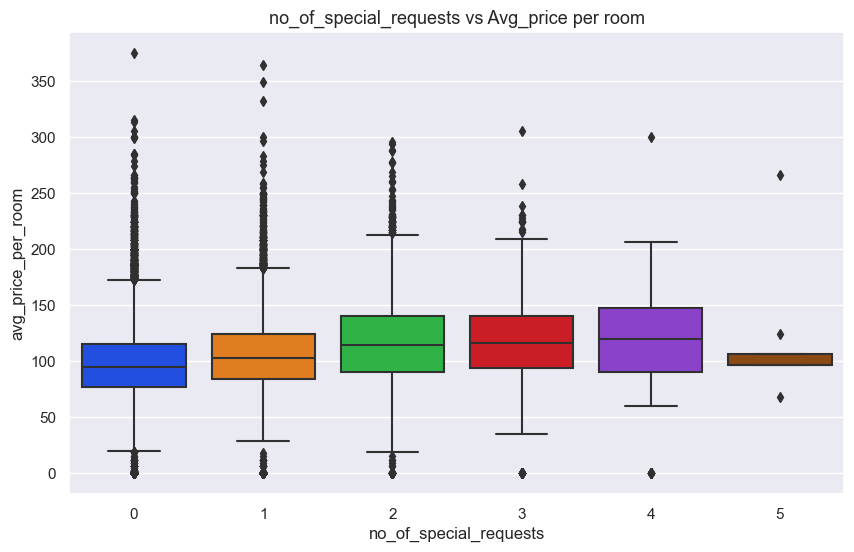

In [55]:
plt.figure(figsize=(10, 6))
plt.title('no_of_special_requests vs Avg_price per room', fontsize = 13)
sns.boxplot(
    data=df, x="no_of_special_requests", y="avg_price_per_room", palette="bright")
plt.show

# lets group according to marketsegment and calculate median for avg price
print ('Median of avg_price :', df.groupby(['no_of_special_requests']).avg_price_per_room.median())

**Observations**:
    
1. The median of avg_price_per_room for 5 special requests is quite close to 0 requests.
2. The avg_price of room is not impacted by number of special requests placed by the guest.

### Weekend or Weeknights vs Booking_status #

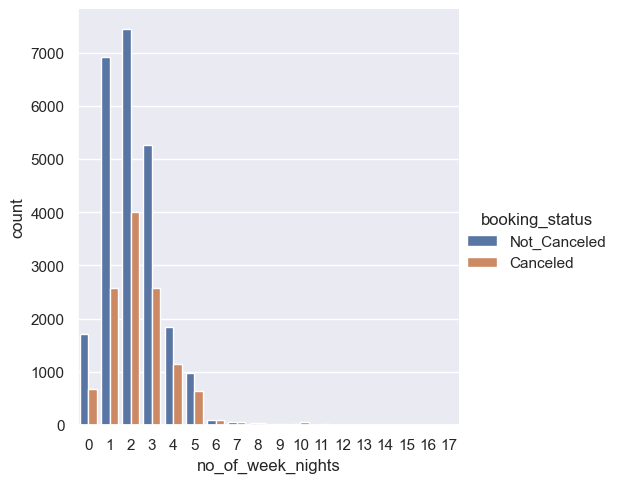

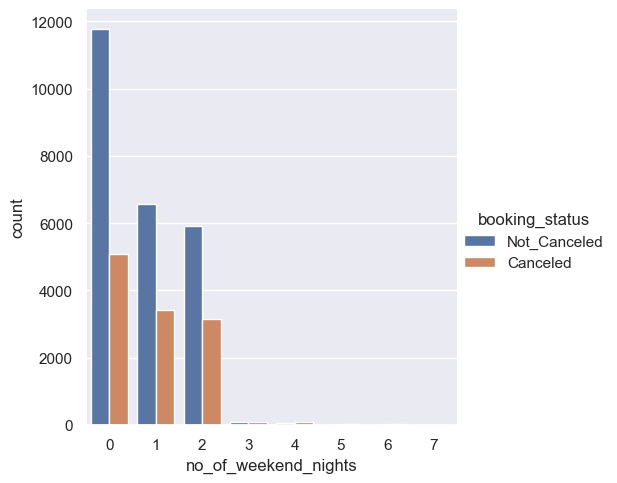

In [56]:
# weekends or weeknights with respect to booking status 

sns.catplot(data=df, x='no_of_week_nights', hue='booking_status', kind='count' )
sns.catplot(data=df, x='no_of_weekend_nights', hue='booking_status', kind='count' )
plt.show()

**Observations**:
    
1. The distribution of week_nights is right skewed and followed same pattern for cancelled and uncacelled bookings.
2. There percentage of cancellation is less for weekdays night as compared to weekend nights.
3. The two data can easily be combined because providing same information as 0 for weekend_nights is containing data from the weekdays

### Booking Status vs Avg_price per room ###

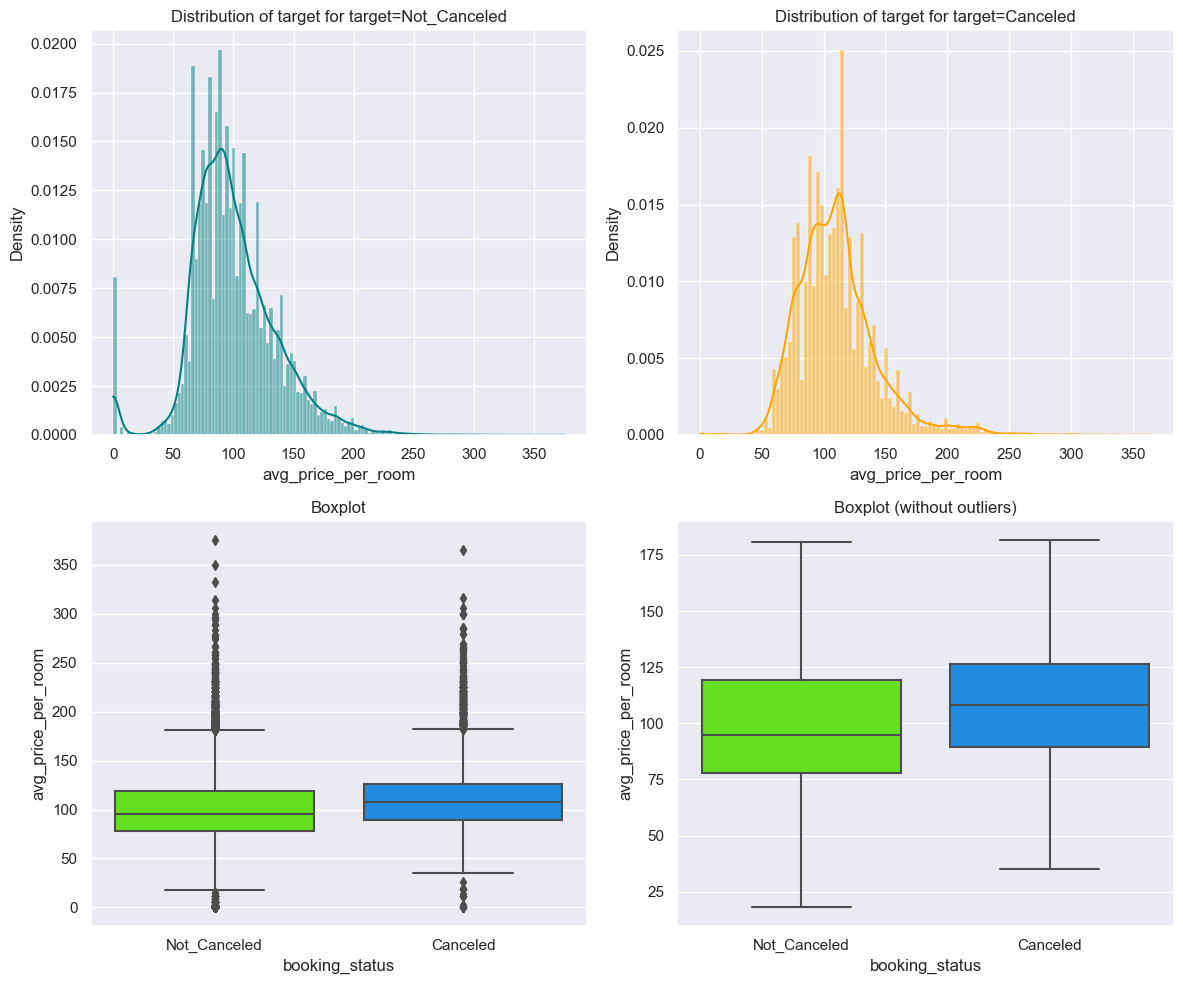

In [57]:
dist_plot_target(df, "avg_price_per_room", "booking_status")

**Observation**:
    
1. The median for avg_price_per_room is slightly higher for cancelled bookings.
2. The higher end of distribution range for both bookings without outliers is at 175 Euro.
3. The distribution range of both types of booking are similar for boxplot with outliers. 

### Booking Status vs Lead time ###

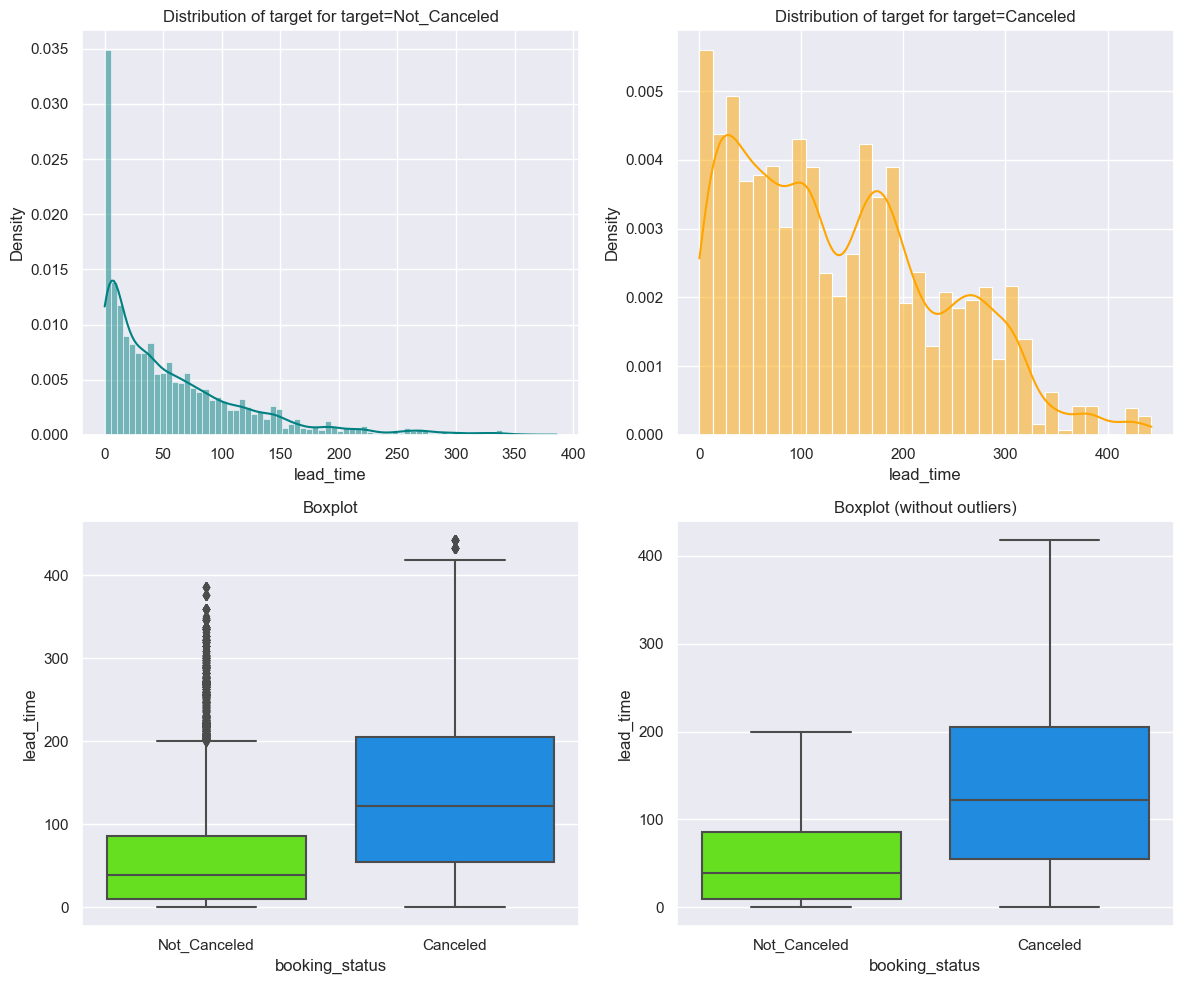

In [58]:
dist_plot_target(df, "lead_time", "booking_status")

In [59]:
df.groupby(['booking_status']).lead_time.median()

booking_status
Canceled       122.00000
Not_Canceled    39.00000
Name: lead_time, dtype: float64

**Observation**:
    
1. Most (> 75%) of cancelled bookings have lead time more than 50 days.
2. The median for uncancelled bookings is 40 days.
3. Usually the bookings which are booked long before the trip, have higher chances of cancellation
    

### Arrival_Month vs Avg_price per room ##

**As hotel room prices are dynamic, Let's see how the prices vary across different months**

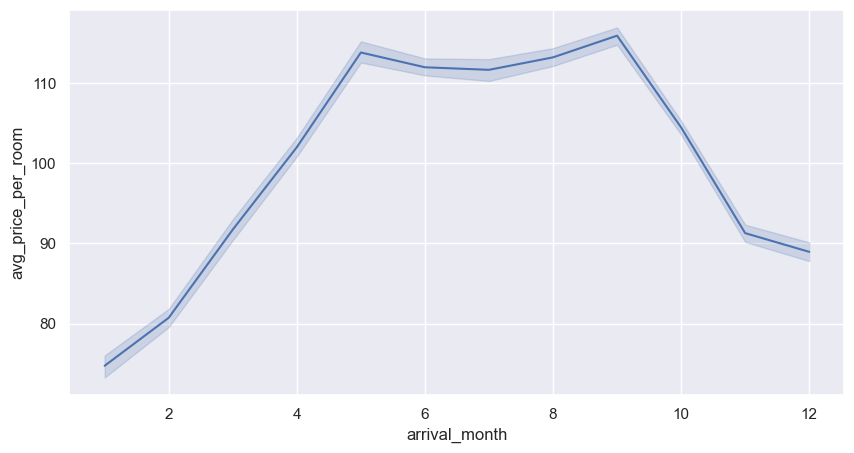

In [60]:
# hotel room prices with resepct to arrival month
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='arrival_month', y='avg_price_per_room')
plt.show()

**Observation**:
    
1. The avg_price_per_room is clearly higher than 110 Euro for two rush months: June and October.
2. Despite having more influx of guests in last 2 months of year, the lower avg_room prices might be  attributed to promotional holiday prices.

### No of Adults+Children vs Booking Status ##

**Dataframe for people travel with their spouse and children and analyze the impact on booking status.**

In [61]:
dfamily = df[(df["no_of_children"] >= 0) & (df["no_of_adults"] > 1)]
dfamily.shape

(28441, 18)

In [62]:
dfamily["total_family_members"] = (dfamily["no_of_adults"] + dfamily["no_of_children"])


booking_status        Canceled  Not_Canceled    All
total_family_members                               
2                         8213         15506  23719
3                         1368          2425   3793
4                          398           514    912
5                            6            11     17
All                       9985         18456  28441


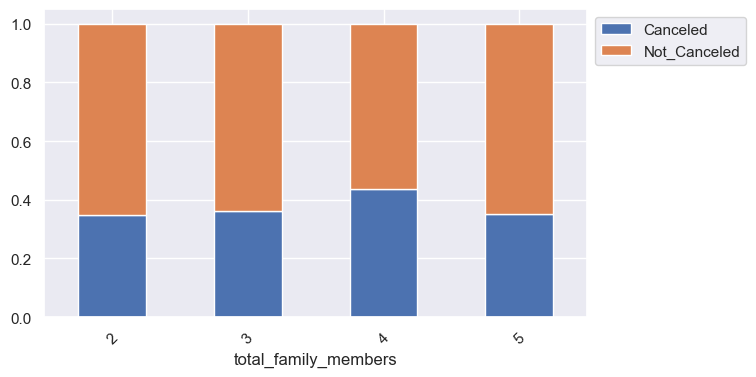

In [63]:
stack_barplot(dfamily, "total_family_members", "booking_status")

**Observations**:
    
1. The chances of cancellation quite similar for all the subgroups and is aroung 38-42%. 

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

**Dataset has no missing data or duplicated values** 

### Outlier Check


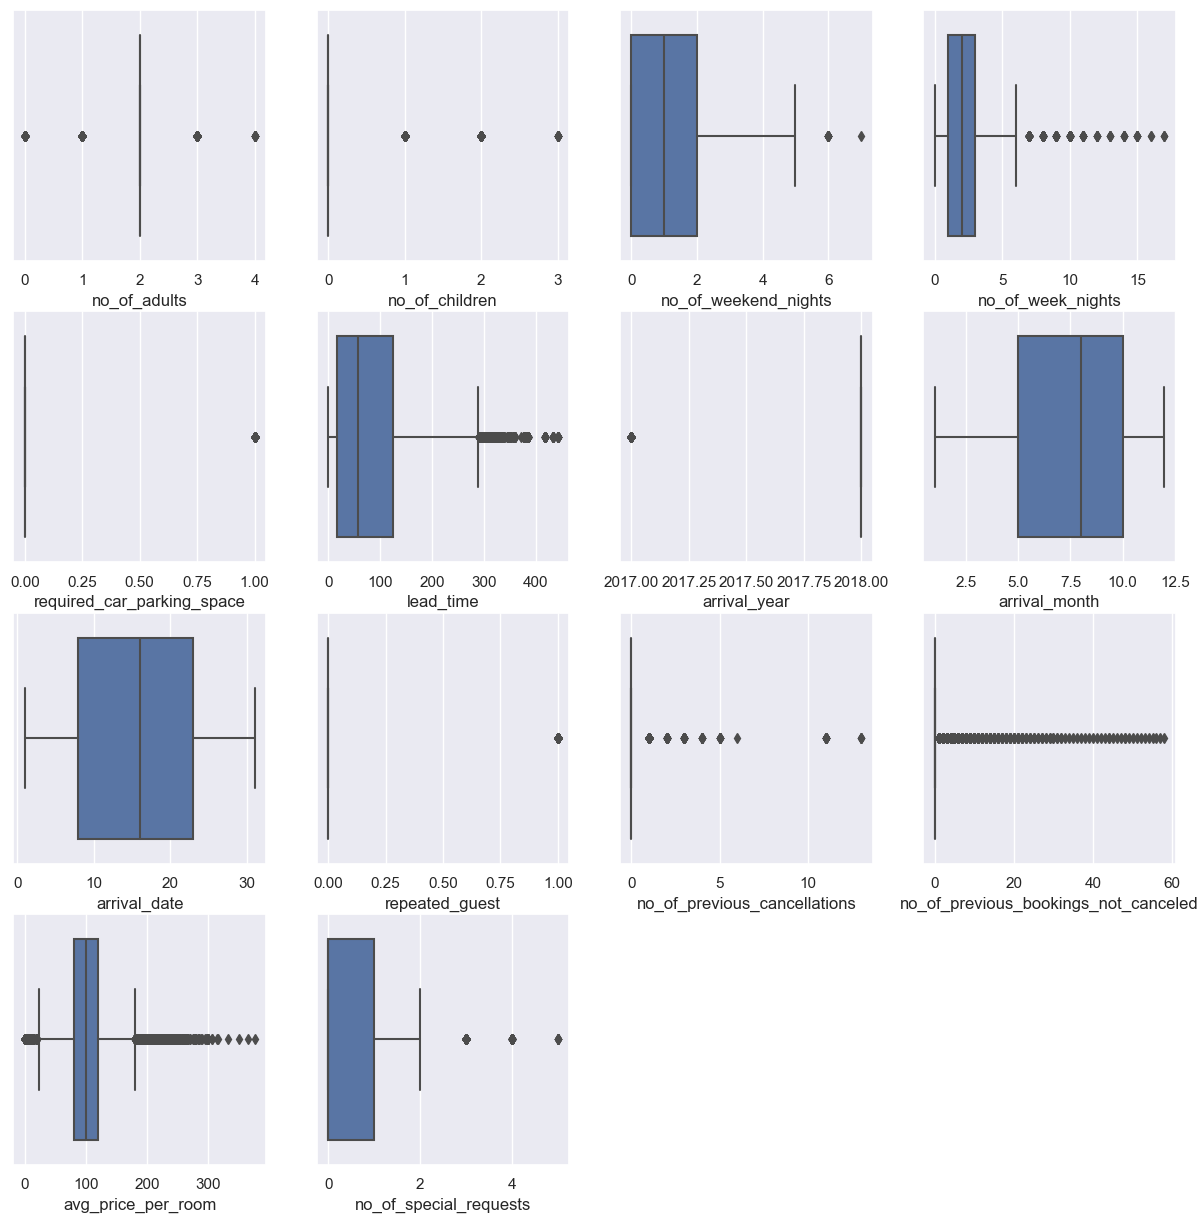

In [64]:
# outlier detection using boxplot

Num_columns = df.select_dtypes(exclude=object).columns.tolist()
plt.figure(figsize=(15, 15))

for i, variable in enumerate(Num_columns):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(data=df, x=variable)

plt.show()


**Observations**

1. As we have outlier for 0 avg_price_per_room but is reflective of given booking type (complementary)
2. The values for arrival_year are random so will remove this column for further analysis. 

### Data Preparation for Modelling ###

In [65]:
#Copy the dataframe df for logit fuction and drop arrival year
df_logit = df.drop('arrival_year', axis=1)

In [66]:
df_logit

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0                 2               0                     1                  2   
1                 2               0                     2                  3   
2                 1               0                     2                  1   
3                 2               0                     0                  2   
4                 2               0                     1                  1   
...             ...             ...                   ...                ...   
36270             3               0                     2                  6   
36271             2               0                     1                  3   
36272             2               0                     2                  6   
36273             2               0                     0                  3   
36274             2               0                     1                  2   

      type_of_meal_plan  required_car_parking_space room_type_reserved  \
0           Meal Plan 1                           0        Room_Type 1   
1          Not Selected                           0        Room_Type 1   
2           Meal Plan 1                           0        Room_Type 1   
3           Meal Plan 1                           0        Room_Type 1   
4          Not Selected                           0        Room_Type 1   
...                 ...                         ...                ...   
36270       Meal Plan 1                           0        Room_Type 4   
36271       Meal Plan 1                           0        Room_Type 1   
36272       Meal Plan 1                           0        Room_Type 1   
36273      Not Selected                           0        Room_Type 1   
36274       Meal Plan 1                           0        Room_Type 1   

       lead_time  arrival_month  arrival_date market_segment_type  \
0            224             10             2             Offline   
1              5             11             6              Online   
2              1              2            28              Online   
3            211              5            20              Online   
4             48              4            11              Online   
...          ...            ...           ...                 ...   
36270         85              8             3              Online   
36271        228             10            17              Online   
36272        148              7             1              Online   
36273         63              4            21              Online   
36274        207             12            30             Offline   

       repeated_guest  no_of_previous_cancellations  \
0                   0                             0   
1                   0                             0   
2                   0                             0   
3                   0                             0   
4                   0                             0   
...               ...                           ...   
36270               0                             0   
36271               0                             0   
36272               0                             0   
36273               0                             0   
36274               0                             0   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                         0            65.00000   
1                                         0           106.68000   
2                                         0            60.00000   
3                                         0           100.00000   
4                                         0            94.50000   
...                                     ...                 ...   
36270                                     0           167.80000   
36271                                     0            90.95000   
36272                                     0            98.39000 

### Feature Engineering

In [67]:
#Adding new column total length of stay for no_of_weekend and week nights 
df_logit['length_stay'] = df_logit['no_of_weekend_nights'] + df_logit['no_of_week_nights']

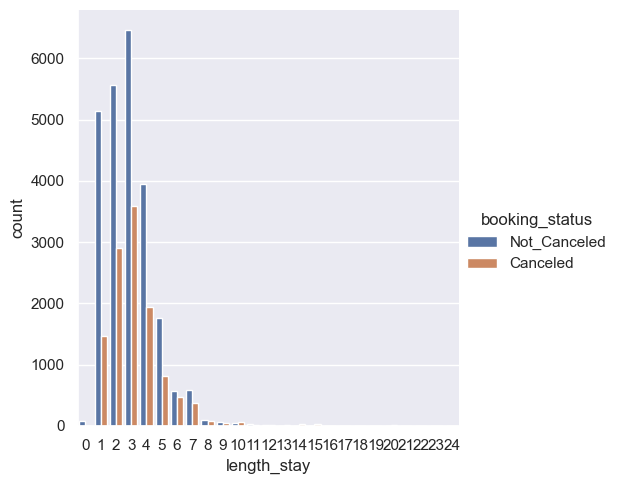

In [68]:
sns.catplot(data=df_logit, x='length_stay', hue='booking_status', kind='count' );

In [69]:
df_logit["total_family_members"] = (df_logit["no_of_adults"] + df_logit["no_of_children"])

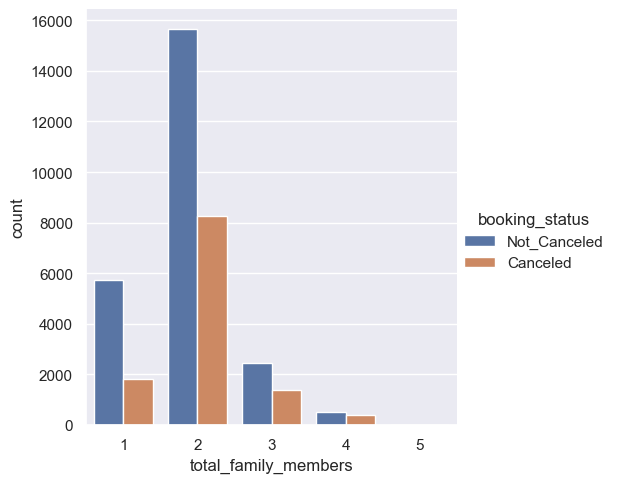

In [70]:
sns.catplot(data=df_logit, x="total_family_members", hue='booking_status', kind='count' );

In [71]:
df_logit

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0                 2               0                     1                  2   
1                 2               0                     2                  3   
2                 1               0                     2                  1   
3                 2               0                     0                  2   
4                 2               0                     1                  1   
...             ...             ...                   ...                ...   
36270             3               0                     2                  6   
36271             2               0                     1                  3   
36272             2               0                     2                  6   
36273             2               0                     0                  3   
36274             2               0                     1                  2   

      type_of_meal_plan  required_car_parking_space room_type_reserved  \
0           Meal Plan 1                           0        Room_Type 1   
1          Not Selected                           0        Room_Type 1   
2           Meal Plan 1                           0        Room_Type 1   
3           Meal Plan 1                           0        Room_Type 1   
4          Not Selected                           0        Room_Type 1   
...                 ...                         ...                ...   
36270       Meal Plan 1                           0        Room_Type 4   
36271       Meal Plan 1                           0        Room_Type 1   
36272       Meal Plan 1                           0        Room_Type 1   
36273      Not Selected                           0        Room_Type 1   
36274       Meal Plan 1                           0        Room_Type 1   

       lead_time  arrival_month  arrival_date market_segment_type  \
0            224             10             2             Offline   
1              5             11             6              Online   
2              1              2            28              Online   
3            211              5            20              Online   
4             48              4            11              Online   
...          ...            ...           ...                 ...   
36270         85              8             3              Online   
36271        228             10            17              Online   
36272        148              7             1              Online   
36273         63              4            21              Online   
36274        207             12            30             Offline   

       repeated_guest  no_of_previous_cancellations  \
0                   0                             0   
1                   0                             0   
2                   0                             0   
3                   0                             0   
4                   0                             0   
...               ...                           ...   
36270               0                             0   
36271               0                             0   
36272               0                             0   
36273               0                             0   
36274               0                             0   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                         0            65.00000   
1                                         0           106.68000   
2                                         0            60.00000   
3                                         0           100.00000   
4                                         0            94.50000   
...                                     ...                 ...   
36270                                     0           167.80000   
36271                                     0            90.95000   
36272                                     0            98.39000 

In [72]:
#drop the 4 columns no_of_adults, children, week_nights, and weekend_nights
df_logit1 = df_logit.drop(['no_of_week_nights','no_of_weekend_nights', 'no_of_adults', 'no_of_children'], axis=1)

In [73]:
df_logit1

type_of_meal_plan  required_car_parking_space room_type_reserved  \
0           Meal Plan 1                           0        Room_Type 1   
1          Not Selected                           0        Room_Type 1   
2           Meal Plan 1                           0        Room_Type 1   
3           Meal Plan 1                           0        Room_Type 1   
4          Not Selected                           0        Room_Type 1   
...                 ...                         ...                ...   
36270       Meal Plan 1                           0        Room_Type 4   
36271       Meal Plan 1                           0        Room_Type 1   
36272       Meal Plan 1                           0        Room_Type 1   
36273      Not Selected                           0        Room_Type 1   
36274       Meal Plan 1                           0        Room_Type 1   

       lead_time  arrival_month  arrival_date market_segment_type  \
0            224             10             2             Offline   
1              5             11             6              Online   
2              1              2            28              Online   
3            211              5            20              Online   
4             48              4            11              Online   
...          ...            ...           ...                 ...   
36270         85              8             3              Online   
36271        228             10            17              Online   
36272        148              7             1              Online   
36273         63              4            21              Online   
36274        207             12            30             Offline   

       repeated_guest  no_of_previous_cancellations  \
0                   0                             0   
1                   0                             0   
2                   0                             0   
3                   0                             0   
4                   0                             0   
...               ...                           ...   
36270               0                             0   
36271               0                             0   
36272               0                             0   
36273               0                             0   
36274               0                             0   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                         0            65.00000   
1                                         0           106.68000   
2                                         0            60.00000   
3                                         0           100.00000   
4                                         0            94.50000   
...                                     ...                 ...   
36270                                     0           167.80000   
36271                                     0            90.95000   
36272                                     0            98.39000   
36273                                     0            94.50000   
36274                                     0           161.67000   

       no_of_special_requests booking_status  length_stay  \
0                           0   Not_Canceled            3   
1                           1   Not_Canceled            5   
2                           0       Canceled            3   
3                           0       Canceled            2   
4                           0       Canceled            2   
...                       ...            ...          ...   
36270                       1   Not_Canceled            8   
36271                       2       Canceled            4   
36272                       2   Not_Canceled            8   
36273                       0       Canceled            3   
36274                       0   Not_Canceled            3   

       total_family_members  
0                         2  
1                         2  

## Model Building

### Let's look at the distribution of target variable

In [74]:
df_logit1["booking_status"].value_counts()

Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64

In [75]:
df_logit1["booking_status"].value_counts(1)

Not_Canceled   0.67236
Canceled       0.32764
Name: booking_status, dtype: float64

The number of booking not cancelled are 67% of the total data available.

**Booking Status not cacelled as 1 and cancelled as 0 to predict future cancellation**

In [76]:
df_logit1["booking_status"] = df_logit1["booking_status"].apply(lambda x: 1 if x == "Canceled" else 0)

In [77]:
df_logit1

type_of_meal_plan  required_car_parking_space room_type_reserved  \
0           Meal Plan 1                           0        Room_Type 1   
1          Not Selected                           0        Room_Type 1   
2           Meal Plan 1                           0        Room_Type 1   
3           Meal Plan 1                           0        Room_Type 1   
4          Not Selected                           0        Room_Type 1   
...                 ...                         ...                ...   
36270       Meal Plan 1                           0        Room_Type 4   
36271       Meal Plan 1                           0        Room_Type 1   
36272       Meal Plan 1                           0        Room_Type 1   
36273      Not Selected                           0        Room_Type 1   
36274       Meal Plan 1                           0        Room_Type 1   

       lead_time  arrival_month  arrival_date market_segment_type  \
0            224             10             2             Offline   
1              5             11             6              Online   
2              1              2            28              Online   
3            211              5            20              Online   
4             48              4            11              Online   
...          ...            ...           ...                 ...   
36270         85              8             3              Online   
36271        228             10            17              Online   
36272        148              7             1              Online   
36273         63              4            21              Online   
36274        207             12            30             Offline   

       repeated_guest  no_of_previous_cancellations  \
0                   0                             0   
1                   0                             0   
2                   0                             0   
3                   0                             0   
4                   0                             0   
...               ...                           ...   
36270               0                             0   
36271               0                             0   
36272               0                             0   
36273               0                             0   
36274               0                             0   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                         0            65.00000   
1                                         0           106.68000   
2                                         0            60.00000   
3                                         0           100.00000   
4                                         0            94.50000   
...                                     ...                 ...   
36270                                     0           167.80000   
36271                                     0            90.95000   
36272                                     0            98.39000   
36273                                     0            94.50000   
36274                                     0           161.67000   

       no_of_special_requests  booking_status  length_stay  \
0                           0               0            3   
1                           1               0            5   
2                           0               1            3   
3                           0               1            2   
4                           0               1            2   
...                       ...             ...          ...   
36270                       1               0            8   
36271                       2               1            4   
36272                       2               0            8   
36273                       0               1            3   
36274                       0               0            3   

       total_family_members  
0                         2  
1                

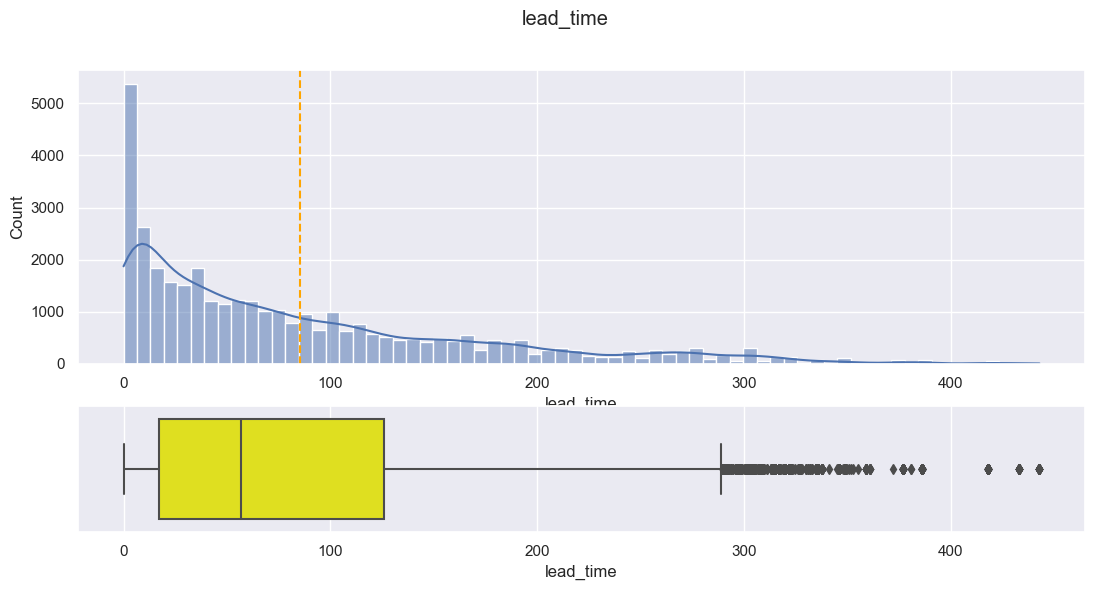

In [78]:
hist_box(df_logit1, 'lead_time')

In [79]:
# lets cut lead time into different subgroups
df_logit1['lead_time_labelled'] = pd.cut(df_logit1['lead_time'], 5, labels=['last_min','short','medium','long','v_long'])

In [80]:
df_logit1

type_of_meal_plan  required_car_parking_space room_type_reserved  \
0           Meal Plan 1                           0        Room_Type 1   
1          Not Selected                           0        Room_Type 1   
2           Meal Plan 1                           0        Room_Type 1   
3           Meal Plan 1                           0        Room_Type 1   
4          Not Selected                           0        Room_Type 1   
...                 ...                         ...                ...   
36270       Meal Plan 1                           0        Room_Type 4   
36271       Meal Plan 1                           0        Room_Type 1   
36272       Meal Plan 1                           0        Room_Type 1   
36273      Not Selected                           0        Room_Type 1   
36274       Meal Plan 1                           0        Room_Type 1   

       lead_time  arrival_month  arrival_date market_segment_type  \
0            224             10             2             Offline   
1              5             11             6              Online   
2              1              2            28              Online   
3            211              5            20              Online   
4             48              4            11              Online   
...          ...            ...           ...                 ...   
36270         85              8             3              Online   
36271        228             10            17              Online   
36272        148              7             1              Online   
36273         63              4            21              Online   
36274        207             12            30             Offline   

       repeated_guest  no_of_previous_cancellations  \
0                   0                             0   
1                   0                             0   
2                   0                             0   
3                   0                             0   
4                   0                             0   
...               ...                           ...   
36270               0                             0   
36271               0                             0   
36272               0                             0   
36273               0                             0   
36274               0                             0   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                         0            65.00000   
1                                         0           106.68000   
2                                         0            60.00000   
3                                         0           100.00000   
4                                         0            94.50000   
...                                     ...                 ...   
36270                                     0           167.80000   
36271                                     0            90.95000   
36272                                     0            98.39000   
36273                                     0            94.50000   
36274                                     0           161.67000   

       no_of_special_requests  booking_status  length_stay  \
0                           0               0            3   
1                           1               0            5   
2                           0               1            3   
3                           0               1            2   
4                           0               1            2   
...                       ...             ...          ...   
36270                       1               0            8   
36271                       2               1            4   
36272                       2               0            8   
36273                       0               1            3   
36274                       0               0            3   

       total_family_members lead_time_labelled  
0                         2 

In [81]:
df_logit1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   type_of_meal_plan                     36275 non-null  object  
 1   required_car_parking_space            36275 non-null  int64   
 2   room_type_reserved                    36275 non-null  object  
 3   lead_time                             36275 non-null  int64   
 4   arrival_month                         36275 non-null  int64   
 5   arrival_date                          36275 non-null  int64   
 6   market_segment_type                   36275 non-null  object  
 7   repeated_guest                        36275 non-null  int64   
 8   no_of_previous_cancellations          36275 non-null  int64   
 9   no_of_previous_bookings_not_canceled  36275 non-null  int64   
 10  avg_price_per_room                    36275 non-null  float64 
 11  no

In [82]:
#dropping lead_time from dataframe as information is captured in "lead_time_labelled"
df_logit1.drop(['lead_time'], axis=1, inplace = True)

In [83]:
df_logit1

type_of_meal_plan  required_car_parking_space room_type_reserved  \
0           Meal Plan 1                           0        Room_Type 1   
1          Not Selected                           0        Room_Type 1   
2           Meal Plan 1                           0        Room_Type 1   
3           Meal Plan 1                           0        Room_Type 1   
4          Not Selected                           0        Room_Type 1   
...                 ...                         ...                ...   
36270       Meal Plan 1                           0        Room_Type 4   
36271       Meal Plan 1                           0        Room_Type 1   
36272       Meal Plan 1                           0        Room_Type 1   
36273      Not Selected                           0        Room_Type 1   
36274       Meal Plan 1                           0        Room_Type 1   

       arrival_month  arrival_date market_segment_type  repeated_guest  \
0                 10             2             Offline               0   
1                 11             6              Online               0   
2                  2            28              Online               0   
3                  5            20              Online               0   
4                  4            11              Online               0   
...              ...           ...                 ...             ...   
36270              8             3              Online               0   
36271             10            17              Online               0   
36272              7             1              Online               0   
36273              4            21              Online               0   
36274             12            30             Offline               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
0                                 0                                     0   
1                                 0                                     0   
2                                 0                                     0   
3                                 0                                     0   
4                                 0                                     0   
...                             ...                                   ...   
36270                             0                                     0   
36271                             0                                     0   
36272                             0                                     0   
36273                             0                                     0   
36274                             0                                     0   

       avg_price_per_room  no_of_special_requests  booking_status  \
0                65.00000                       0               0   
1               106.68000                       1               0   
2                60.00000                       0               1   
3               100.00000                       0               1   
4                94.50000                       0               1   
...                   ...                     ...             ...   
36270           167.80000                       1               0   
36271            90.95000                       2               1   
36272            98.39000                       2               0   
36273            94.50000                       0               1   
36274           161.67000                       0               0   

       length_stay  total_family_members lead_time_labelled  
0                3                     2             medium  
1                5                     2           last_min  
2                3                     1           last_min  
3                2                     2             medium  
4                2                     2           last_min  
...            ...                   ...                ...  
36270            8                     3

## EDA

- It is a good idea to explore the data once again after manipulating it.

<Axes: >

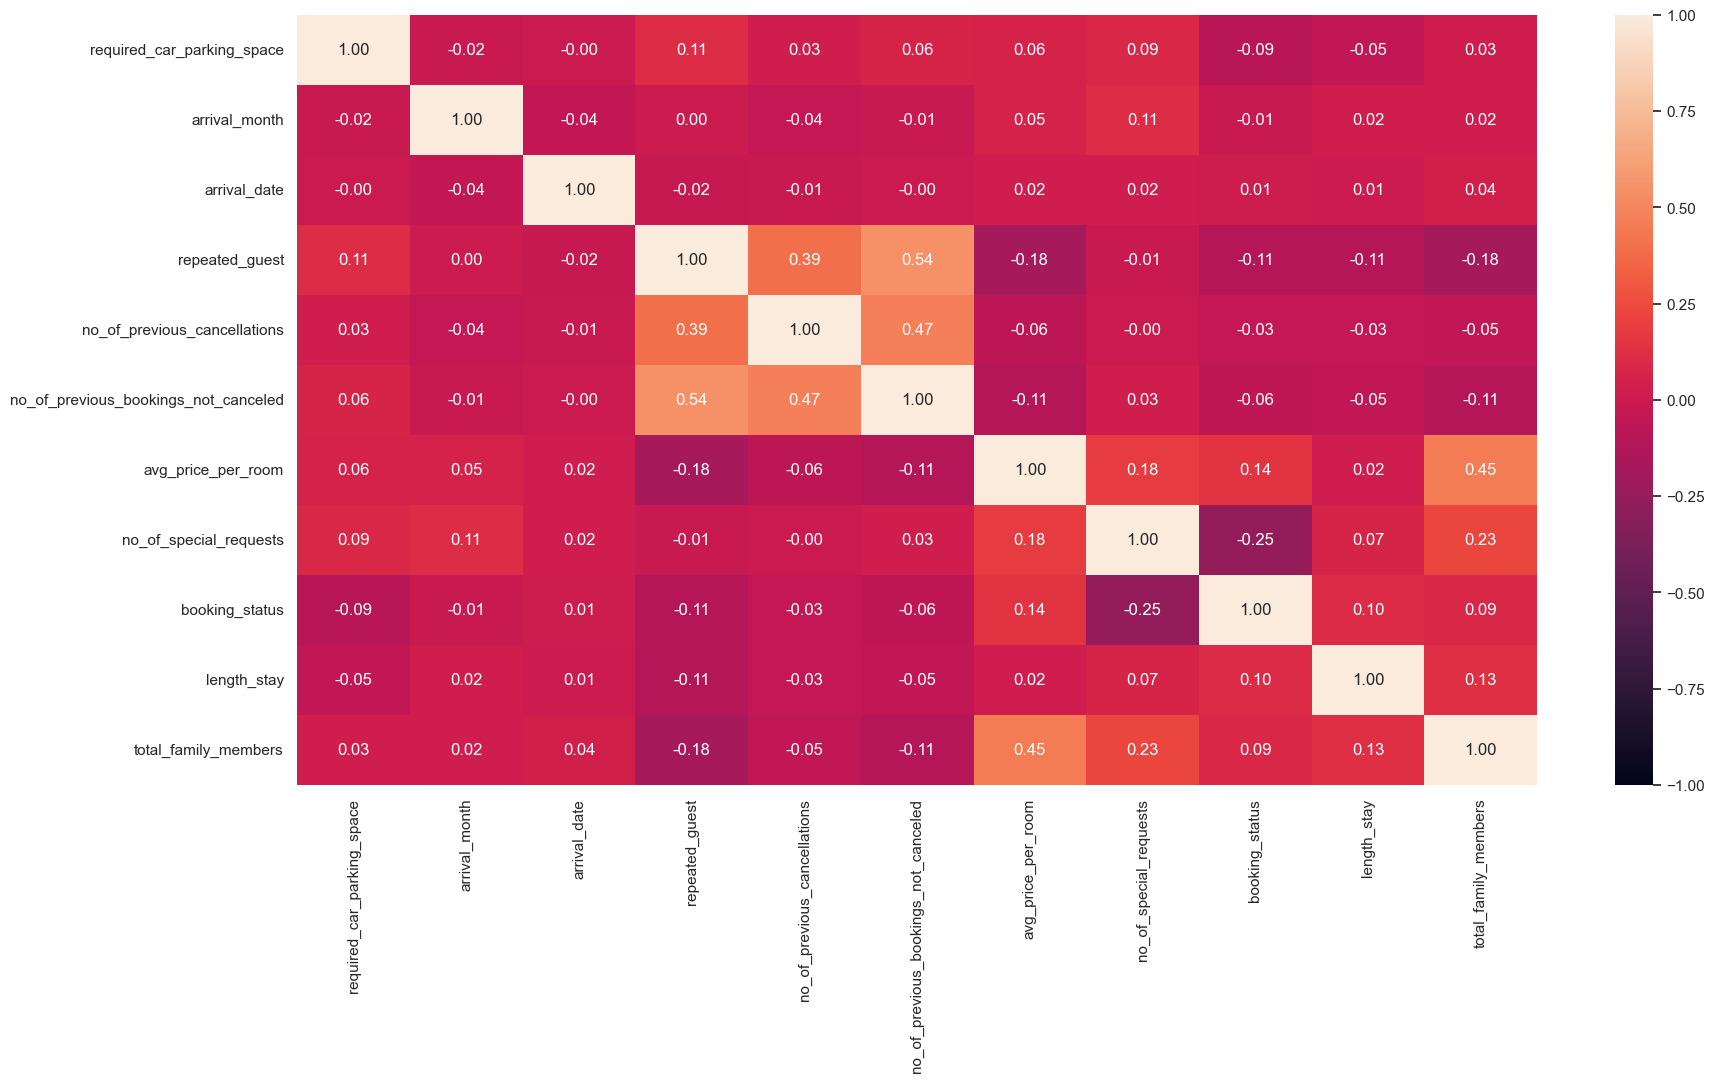

In [84]:
df_logit1_attr = df_logit1.select_dtypes(exclude=object)
plt.figure(figsize=(20,10))
sns.heatmap(df_logit1_attr.corr(), annot=True, vmin=-1, vmax=1, fmt='.2f')

1. The correlation coefficient between avg_price is little high .45 with total family members.
2. All the other independent variables still have low correlation.

### Creating training and test sets 

In [85]:
# specifying the independent  and dependent variables
X = df_logit1.drop(["booking_status"], axis=1)
Y = df_logit1["booking_status"]

# adding a constant to the independent variables
X = sm.add_constant(X)

# creating dummy variables
X = pd.get_dummies(X, drop_first=True)

# splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1,  stratify=Y)

In [86]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 28 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   const                                 36275 non-null  float64
 1   required_car_parking_space            36275 non-null  int64  
 2   arrival_month                         36275 non-null  int64  
 3   arrival_date                          36275 non-null  int64  
 4   repeated_guest                        36275 non-null  int64  
 5   no_of_previous_cancellations          36275 non-null  int64  
 6   no_of_previous_bookings_not_canceled  36275 non-null  int64  
 7   avg_price_per_room                    36275 non-null  float64
 8   no_of_special_requests                36275 non-null  int64  
 9   length_stay                           36275 non-null  int64  
 10  total_family_members                  36275 non-null  int64  
 11  type_of_meal_pl

In [87]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 28)
Shape of test set :  (10883, 28)
Percentage of classes in training set:
0   0.67238
1   0.32762
Name: booking_status, dtype: float64
Percentage of classes in test set:
0   0.67233
1   0.32767
Name: booking_status, dtype: float64


**Observation**: 

1. The data (train and testb) has split in ratio of 67 to 32 ratio for not_cancelled booking vs cancelled booking like original dataset.
2. All the data types of X is converted to numerical columns. 

## EDA

To check correlation of independent variables 

<Axes: >

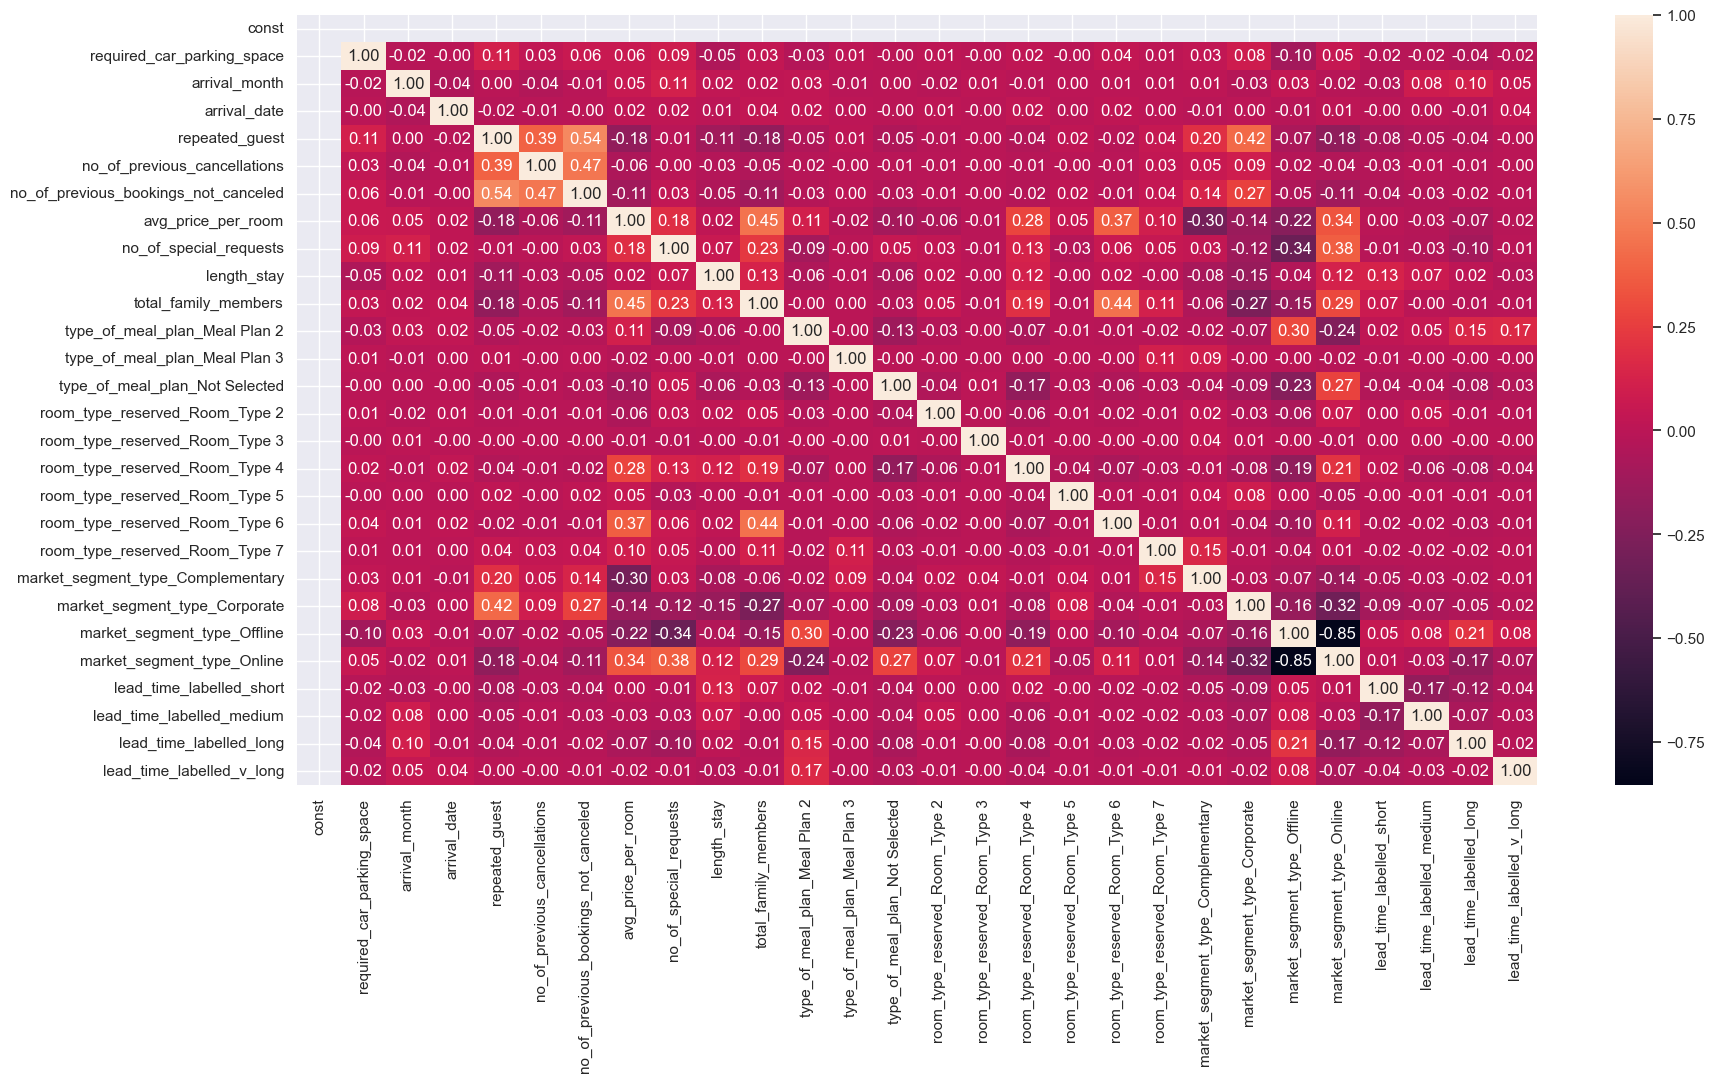

In [88]:
plt.figure(figsize=(20,10))
sns.heatmap(X.corr(), annot=True, fmt='.2f')

**Observations**:

1. As there is strong correlation coefficient between different independent X variables it will better to check multicollinearity

## Building a Logistic Regression model

In [89]:
# fitting logistic regression model
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit()


         Current function value: 0.435676
         Iterations: 35


In [90]:
# let's print the logistic regression summary
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25364
Method:                           MLE   Df Model:                           27
Date:                Sun, 30 Apr 2023   Pseudo R-squ.:                  0.3112
Time:                        21:55:08   Log-Likelihood:                -11063.
converged:                      False   LL-Null:                       -16060.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -2.6130      0.273     -9.569      0.000      -3.148      -2.078
required_car_parking_space              -1.6421      

**Observations**:

1. The Negative coefficient show that the factor is negatively correlated to booking, whereas positive values will positive impact on booking chances.

2. As there is strong correlation coefficient between different independent X variables it will better to check multicollinearity.

### Model evaluation criterion

### Model can make wrong predictions as:

1. Predicting a customer will not cancel their booking but in reality, the customer will cancel their booking.
2. Predicting a customer will cancel their booking but in reality, the customer will not cancel their booking. 

### Which case is more important? 
* Both the cases are important as:

* If we predict that a booking will not be canceled and the booking gets canceled then the hotel will lose resources and will have to bear additional costs of distribution channels.

* If we predict that a booking will get canceled and the booking doesn't get canceled the hotel might not be able to provide satisfactory services to the customer by assuming that this booking will be canceled. This might damage the brand equity. 


### How to reduce the losses?

* Hotel would want `F1 Score` to be maximized, greater the F1  score higher are the chances of minimizing False Negatives and False Positives. 

In [91]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance
    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [92]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(5, 3))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("Actual ")
    plt.xlabel("Predicted ")

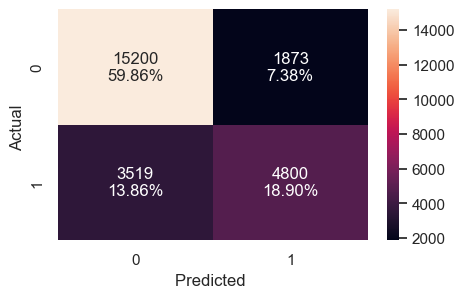

In [93]:
#confusion matrix for first model 
confusion_matrix_statsmodels(lg, X_train, y_train)

In [94]:
print("Training performance:")
model_performance_classification_statsmodels(lg, X_train, y_train)

Training performance:


Accuracy  Recall  Precision      F1
0   0.78765 0.57699    0.71932 0.64034

**Observation**:
    
1. The first model has f1 of .64 and recall of .577 we will compare with subsequent models after treating for multicollinearity.

## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

In [95]:
# let's check the VIF of the predictors
vif_series = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
    dtype=float,
)
print("VIF values: \n\n{}\n".format(vif_series))

VIF values: 

const                                  321.69409
required_car_parking_space               1.03457
arrival_month                            1.05534
arrival_date                             1.00869
repeated_guest                           1.74791
no_of_previous_cancellations             1.32167
no_of_previous_bookings_not_canceled     1.56601
avg_price_per_room                       1.91281
no_of_special_requests                   1.24698
length_stay                              1.09959
total_family_members                     1.67605
type_of_meal_plan_Meal Plan 2            1.20653
type_of_meal_plan_Meal Plan 3            1.00782
type_of_meal_plan_Not Selected           1.22934
room_type_reserved_Room_Type 2           1.03802
room_type_reserved_Room_Type 3           1.00379
room_type_reserved_Room_Type 4           1.30941
room_type_reserved_Room_Type 5           1.03046
room_type_reserved_Room_Type 6           1.49445
room_type_reserved_Room_Type 7           1.08544
market

**Observation and Action**:
    
1. There are columns with very high VIF (Variance Inflation factor), lets drop drop the columns with VIF>5.

In [96]:
#dropping the columns with VIF > 5
X_train1 = X_train.drop(['market_segment_type_Online', 
                         'market_segment_type_Offline',
                         'market_segment_type_Corporate',
                        ], axis=1)

In [97]:
# fitting logistic regression model
logit = sm.Logit(y_train, X_train1.astype(float))
lg1 = logit.fit()


         Current function value: 0.460004
         Iterations: 35


In [98]:
# print the logistic regression summary
print(lg1.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25367
Method:                           MLE   Df Model:                           24
Date:                Sun, 30 Apr 2023   Pseudo R-squ.:                  0.2727
Time:                        21:55:10   Log-Likelihood:                -11680.
converged:                      False   LL-Null:                       -16060.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -3.6269      0.099    -36.713      0.000      -3.820      -3.433
required_car_parking_space              -1.4529      

In [99]:
# let's check the VIF of the predictors
vif_series = pd.Series(
    [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])],
    index=X_train1.columns,
    dtype=float,
)
print("VIF values: \n\n{}\n".format(vif_series))

VIF values: 

const                                  31.89475
required_car_parking_space              1.03027
arrival_month                           1.05208
arrival_date                            1.00792
repeated_guest                          1.56075
no_of_previous_cancellations            1.30767
no_of_previous_bookings_not_canceled    1.55284
avg_price_per_room                      1.80653
no_of_special_requests                  1.13530
length_stay                             1.08272
total_family_members                    1.60881
type_of_meal_plan_Meal Plan 2           1.13230
type_of_meal_plan_Meal Plan 3           1.00768
type_of_meal_plan_Not Selected          1.10285
room_type_reserved_Room_Type 2          1.02537
room_type_reserved_Room_Type 3          1.00378
room_type_reserved_Room_Type 4          1.28427
room_type_reserved_Room_Type 5          1.01832
room_type_reserved_Room_Type 6          1.48560
room_type_reserved_Room_Type 7          1.08366
market_segment_type_Comple

In [100]:
# test performance


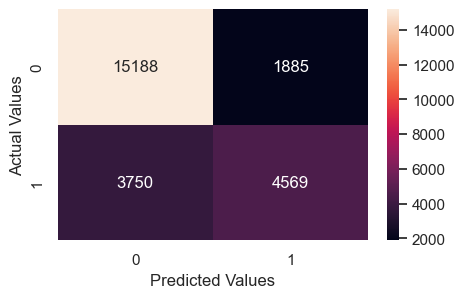

In [101]:
#Confusion Matrix
cm = confusion_matrix(y_train, pred_train)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt="g")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

In [102]:
print("Training performance:")
model_performance_classification_statsmodels(lg1, X_train1, y_train)

Training performance:


Accuracy  Recall  Precision      F1
0   0.77808 0.54922    0.70793 0.61856

**Observations and Actions**:
    
1. The f1 and recall values are slightly dropped from first model.
2. We will treat data for high p values now.


### Removing high p-value variables

#### Dropping high p-value variables

- We will drop the predictor variables having a p-value greater than 0.05 as they do not significantly impact the target variable.
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.
- Instead, we will do the following:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value.
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
    - Repeat the above two steps till there are no columns with p-value > 0.05.

The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [103]:
# initial list of columns
cols = X_train1.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    X_train_aux = X_train1[cols]

    # fitting the model
    model = sm.Logit(y_train, X_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'required_car_parking_space', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'length_stay', 'total_family_members', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'lead_time_labelled_short', 'lead_time_labelled_medium', 'lead_time_labelled_long', 'lead_time_labelled_v_long']


In [104]:
X_train2 = X_train1[selected_features]

In [105]:
logit = sm.Logit(y_train, X_train2.astype(float))
lg2 = logit.fit()

Optimization terminated successfully.
         Current function value: 0.460467
         Iterations 9


In [106]:
print(lg2.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25374
Method:                           MLE   Df Model:                           17
Date:                Sun, 30 Apr 2023   Pseudo R-squ.:                  0.2720
Time:                        21:55:12   Log-Likelihood:                -11692.
converged:                       True   LL-Null:                       -16060.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -3.6187      0.091    -39.652      0.000      -3.798      -3.440
required_car_parking_space        -1.4532      0.133    -10.890      0.

## Model performance evaluation

####  Converting coefficients to odds
* The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients. 
* Therefore, **odds =  exp(b)**
* The percentage change in odds is given as **odds = (exp(b) - 1) * 100**

In [107]:
# converting coefficients to odds
odds = np.exp(lg2.params)

# finding the percentage change
perc_change_odds = (np.exp(lg2.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train2.columns).T

const  required_car_parking_space  arrival_month  \
Odds          0.02682                     0.23382        0.93309   
Change_odd% -97.31820                   -76.61763       -6.69105   

             repeated_guest  no_of_previous_cancellations  avg_price_per_room  \
Odds                0.05599                       1.25096             1.02290   
Change_odd%       -94.40097                      25.09632             2.28974   

             no_of_special_requests  length_stay  total_family_members  \
Odds                        0.30901      1.12730               1.23717   
Change_odd%               -69.09908     12.73022              23.71697   

             type_of_meal_plan_Meal Plan 2  type_of_meal_plan_Not Selected  \
Odds                               0.69396                         2.08857   
Change_odd%                      -30.60400                       108.85692   

             room_type_reserved_Room_Type 5  room_type_reserved_Room_Type 6  \
Odds                                0.41990                         0.37549   
Change_odd%                       -58.00995                       -62.45083   

             room_type_reserved_Room_Type 7  lead_time_labelled_short  \
Odds                                0.17442                   3.78831   
Change_odd%                       -82.55845                 278.83054   

             lead_time_labelled_medium  lead_time_labelled_long  \
Odds                          16.26461                 21.90776   
Change_odd%                 1526.46077               2090.77574   

             lead_time_labelled_v_long  
Odds                         144.66752  
Change_odd%                14366.75154

### Coefficient interpretations

**Lead time**

1. The odds of booking of cancellation increase exponentially with increase in lead time.
2. The odds of cancellation increased by 144.66 times if lead_time_labelled_v_long increases by 1 unit keeping all parameters same or 14466 % increase in odds for cancellation.
3. The odds of cancellation increases by 21.9 times if lead_time_labelled_long increases by 1 unit keeping all parameters same.
4. The odds of cancellation increases by 16.2 times if lead_time_labelled_medium increases by 1 unit keeping all parameters same.

**Meal plan**

5. The odds of cancellation increase by 108% if no meal plan is selected.
6. The odds of cancellation decreases by 30% if mean plan 2 is selected.

**Repeated Guest**

7. The odds of cancellation decreases by 94.4% when booking is done by repeated guest.

**Special Request**

8. The odds of cancellation decreases by 69% when booking is done with special request.

**Car Parking**

9. The odds of cancellation decreases by 76% when booking is done with reserved car parking space.

**Avg Price**

10. The odds of cancellation increases by 2.3 % with increase in avg_price_per_room.









## Final Model Summary

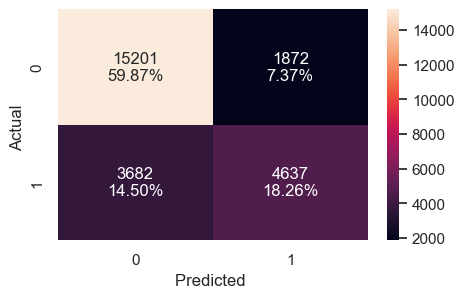

In [108]:
#confusion matrix for first model 
confusion_matrix_statsmodels(lg2, X_train2, y_train)

In [109]:
print("Training performance:")
model_performance_classification_statsmodels(lg2, X_train2, y_train)

Training performance:


Accuracy  Recall  Precision      F1
0   0.78127 0.55740    0.71240 0.62544

**Observation**:
    
1. The f1 value is slightly dropped to .625 from first model f1 of .64.
2. The accuracy of .78 is quite high in comparable to inital model. 
3. The model has precision of .712.

**Test set performance**

Let first drop the columns from the test set that were dropped from the training set.

In [110]:
X_test2 = X_test[list(X_train2.columns)]

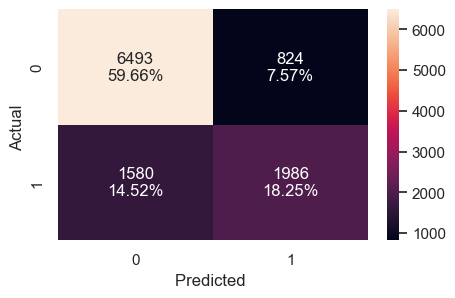

In [111]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_test2, y_test)

In [112]:
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg2, X_test2, y_test
)

print("Test performance:")
log_reg_model_test_perf

Test performance:


Accuracy  Recall  Precision      F1
0   0.77911 0.55693    0.70676 0.62296

### ROC Curve and ROC-AUC

#### ROC-AUC
* ROC-AUC on training set

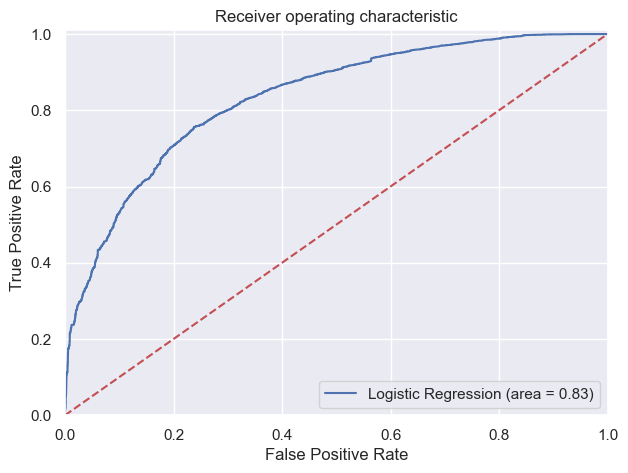

In [113]:
logit_roc_auc_train = roc_auc_score(y_train, lg2.predict(X_train2))
fpr, tpr, thresholds = roc_curve(y_train, lg2.predict(X_train2))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

**Observation and Actions**

1. Logistic Regression model is giving a good performance on training set.
2. Lets test optimal thershold as per ROC curve.

### Optimal threshold using AUC-ROC curve

In [114]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg2.predict(X_train2))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.32535759371010786


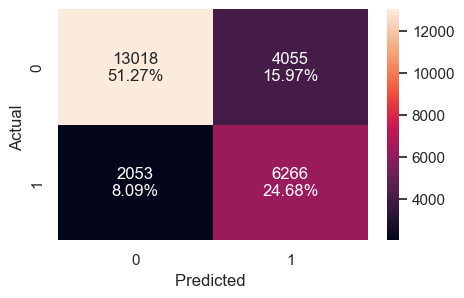

In [115]:
# creating confusion matrix with threshold
confusion_matrix_statsmodels(
    lg2, X_train2, y_train, threshold=optimal_threshold_auc_roc
)

In [116]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg2, X_train2, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


Accuracy  Recall  Precision      F1
0   0.75945 0.75322    0.60711 0.67232

**Test set performance with new threshold**

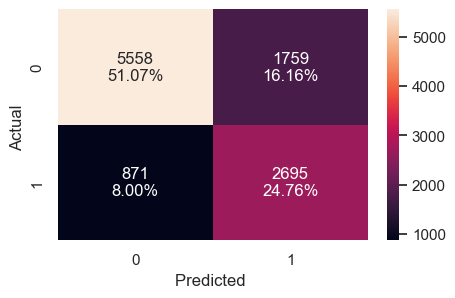

In [121]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_test2, y_test, threshold=optimal_threshold_auc_roc)

In [122]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg2, X_test2, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


Accuracy  Recall  Precision      F1
0   0.75834 0.75575    0.60507 0.67207

In [164]:
log_reg_model_train_perf_threshold_auc_roc

Accuracy  Recall  Precision      F1
0   0.75945 0.75322    0.60711 0.67232

**Observation**:
    
1. The f1 value has improved to .67 from previous models for test and training dataset.
2. The accuracy has reduced from .78 to .75
3. The precision has reduced to .60 from .712.
4. The recall is .75 for both training and testing dataset.

**Checking model performance on test set**

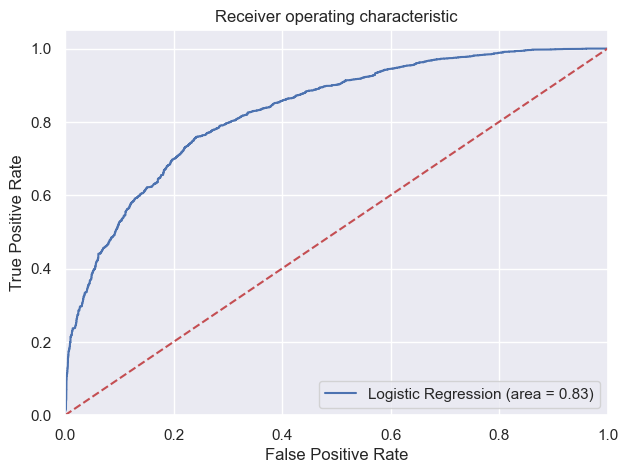

In [123]:
logit_roc_auc_train = roc_auc_score(y_test, lg2.predict(X_test2))
fpr, tpr, thresholds = roc_curve(y_test, lg2.predict(X_test2))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

The logistic regression area is .83 for ROC-AOC for testing dataset

## Building a Decision Tree model

In [124]:
# building a decision tree using the dtclassifier function
dec_Tree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dec_Tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

#### Checking model performance on training set

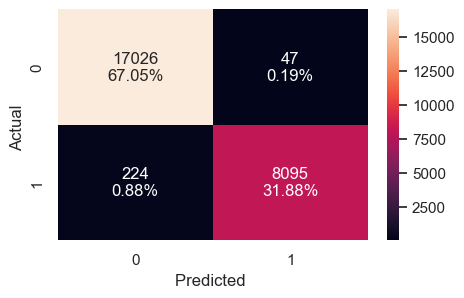

In [125]:
confusion_matrix_statsmodels(dec_Tree, X_train, y_train)

In [126]:
decision_tree_perf_train = model_performance_classification_statsmodels(
    dec_Tree, X_train, y_train
)
decision_tree_perf_train

Accuracy  Recall  Precision      F1
0   0.98933 0.97307    0.99423 0.98354

#### Checking model performance on test set

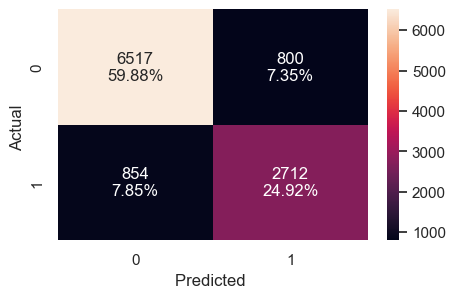

In [127]:
confusion_matrix_statsmodels(dec_Tree, X_test, y_test)

In [128]:
decision_tree_perf_test = model_performance_classification_statsmodels(
    dec_Tree, X_test, y_test
)
decision_tree_perf_test

Accuracy  Recall  Precision      F1
0   0.84802 0.76052    0.77221 0.76632

In [129]:
decision_tree_perf_train

Accuracy  Recall  Precision      F1
0   0.98933 0.97307    0.99423 0.98354

**Observations**:
    
1. The decision tree overfitting the training data with above .97 values for accuracy, recall, precision and f1.
2. The accuracy is pretty good (.848) on testing data.
3. The recall, precision and f1 are around .76 for test data is better than logit model.


**Before pruning the tree let's check the important features.**

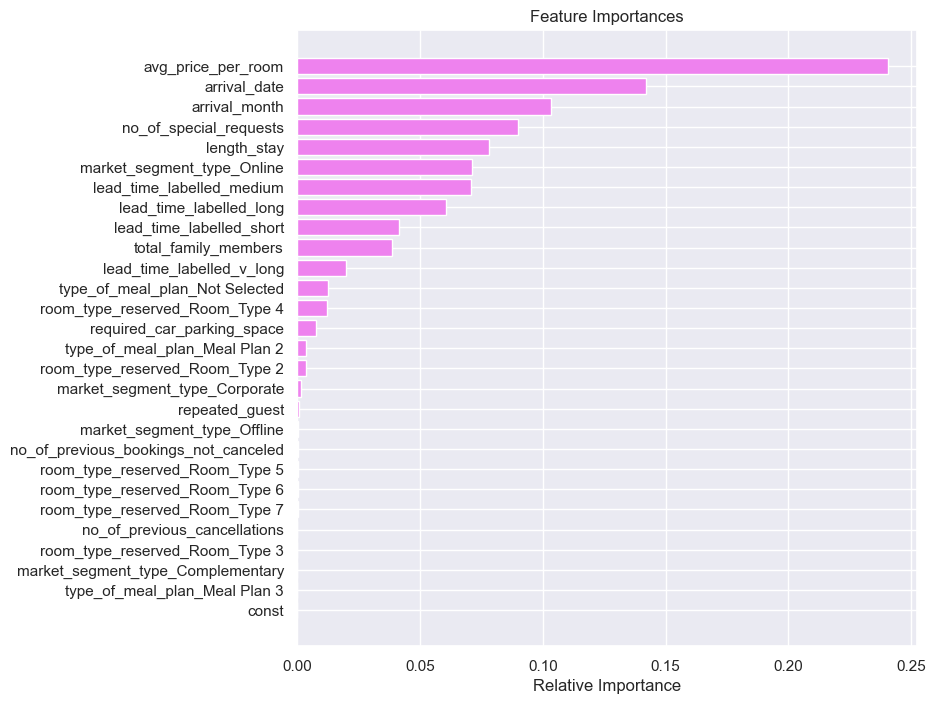

In [130]:
feature_names = list(X_train.columns)
importances = dec_Tree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Do we need to prune the tree?

**Observations**:
    
1. Most of variables which are least important were dropped from the logit regression model too.
2. The avg_price per room is with arrival date are most important features in booking prediction.
3. The different subgroups of lead_time are also important features in the decision tree but are not prominent as in logit model.


**Actions**
1. As tree is overfitting training data to .98% for all the parameters it is not good model for prediction.
3. Therefore decision tree will require pruning to work as better predicting model for test data.

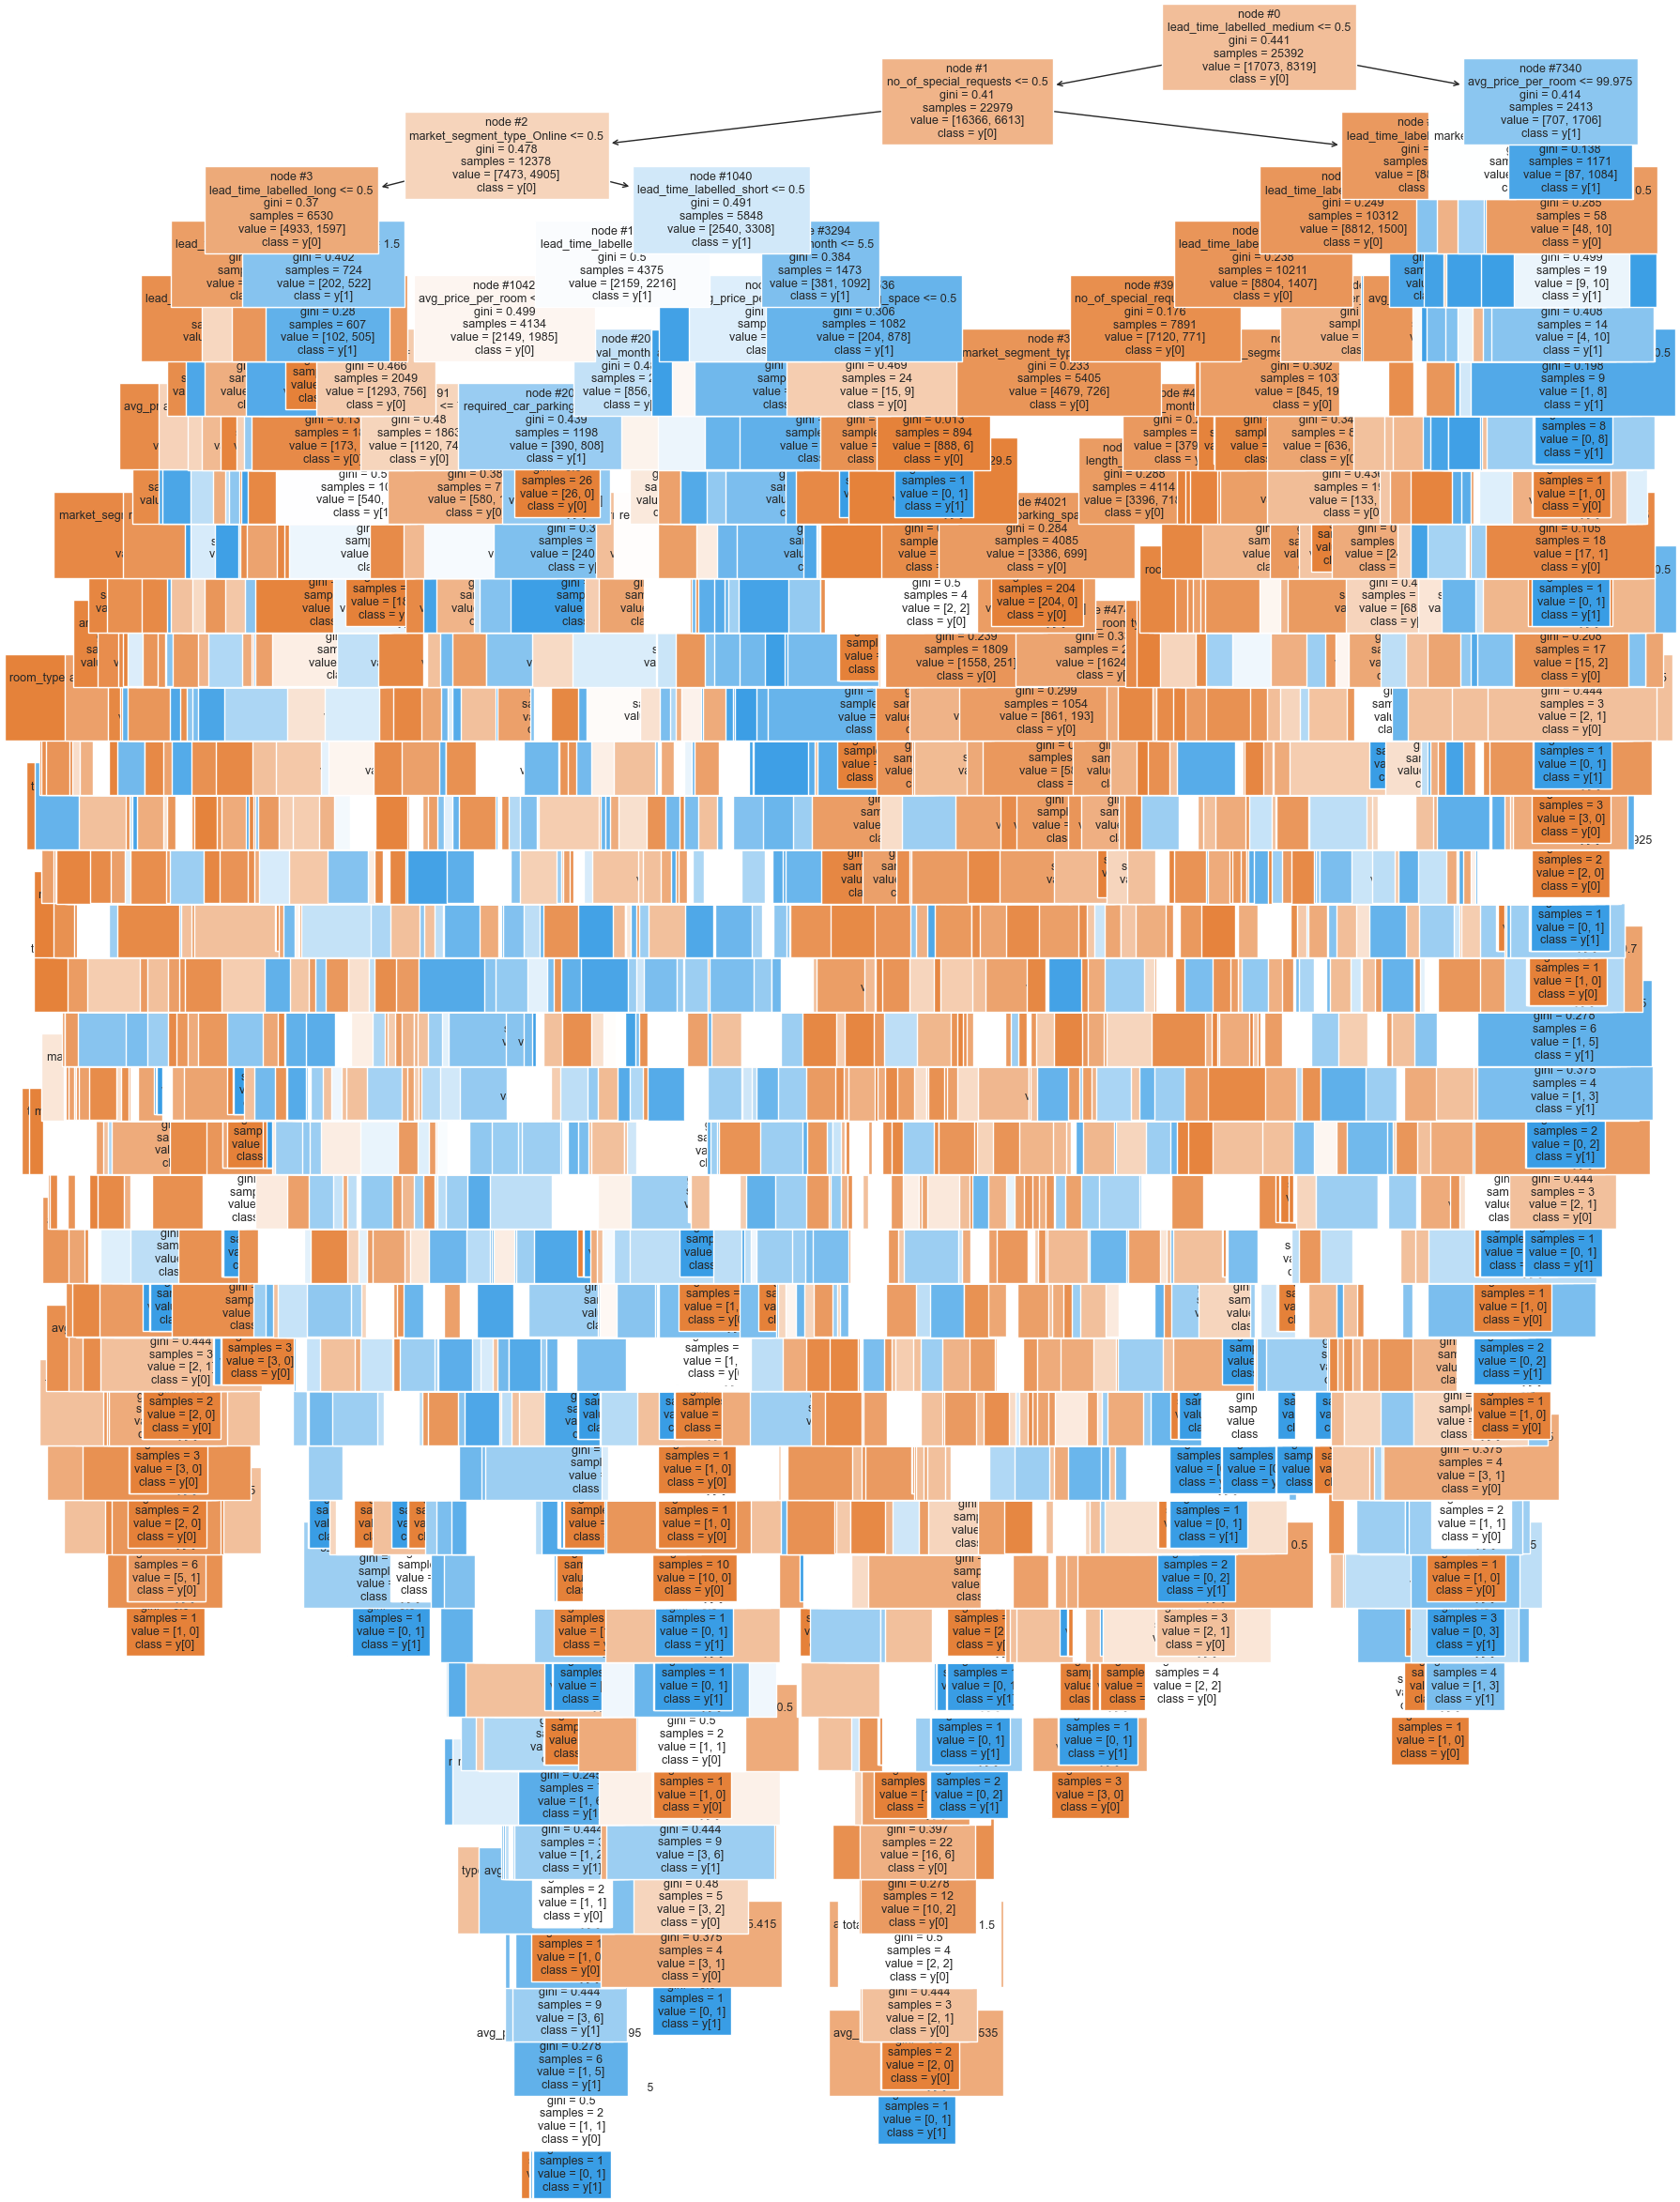

In [131]:
#plotting the decision tree
plt.figure(figsize=(20,30))
tree.plot_tree(dec_Tree,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

### Decision Tree (Pre-pruning)

In [132]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight="balanced")

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, max_leaf_nodes=50,
                       min_samples_split=30, random_state=1)

In [135]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=50, min_samples_split=10,
                       random_state=1)

#### Checking performance on training set

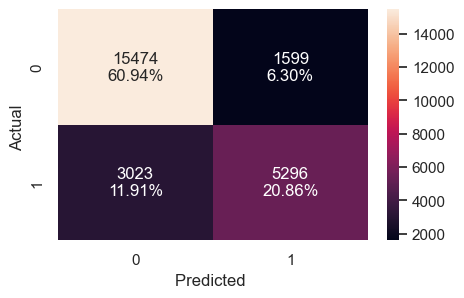

In [136]:
confusion_matrix_statsmodels(estimator, X_train, y_train)

In [137]:
decision_tree_prune_train = model_performance_classification_statsmodels(
    estimator, X_train, y_train
)
decision_tree_prune_train

Accuracy  Recall  Precision      F1
0   0.81797 0.63661    0.76809 0.69620

#### Checking model performance on test set

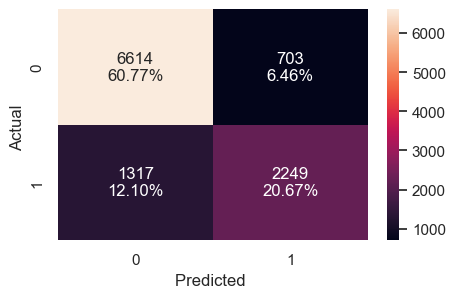

In [138]:
confusion_matrix_statsmodels(estimator, X_test, y_test)

In [139]:
decision_tree_prune_test = model_performance_classification_statsmodels(
    estimator, X_test, y_test)
decision_tree_prune_test

Accuracy  Recall  Precision      F1
0   0.81439 0.63068    0.76186 0.69009

In [140]:
decision_tree_prune_train

Accuracy  Recall  Precision      F1
0   0.81797 0.63661    0.76809 0.69620

**Observations**:
    
1. This pre pruned decision tree is not overfitting and provide good fit for test data as well.
2. The accuracy and recall for test data is around .814 quite close to .817 of training data.
3. The recall for test data and training data is around .63.
4. The f1 for test data is better than all models is about .696.

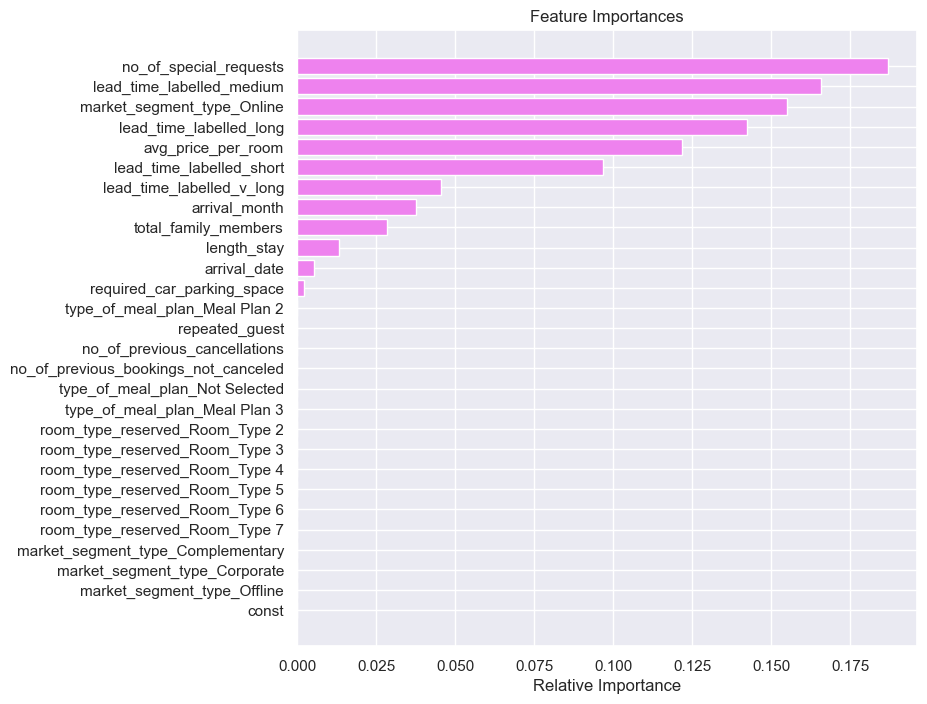

In [141]:
# Looking at the feature importances of this model
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observaiton**

1. The cancellation is quite dependent on lead_time_labelled_medium and other subgroups of lead_time are quite important features in this pruned decision tree.
2. The no_special_requests is most important feature in this decision tree. 
3. The market_segment and online booking is another important feature which is important featur in this model.


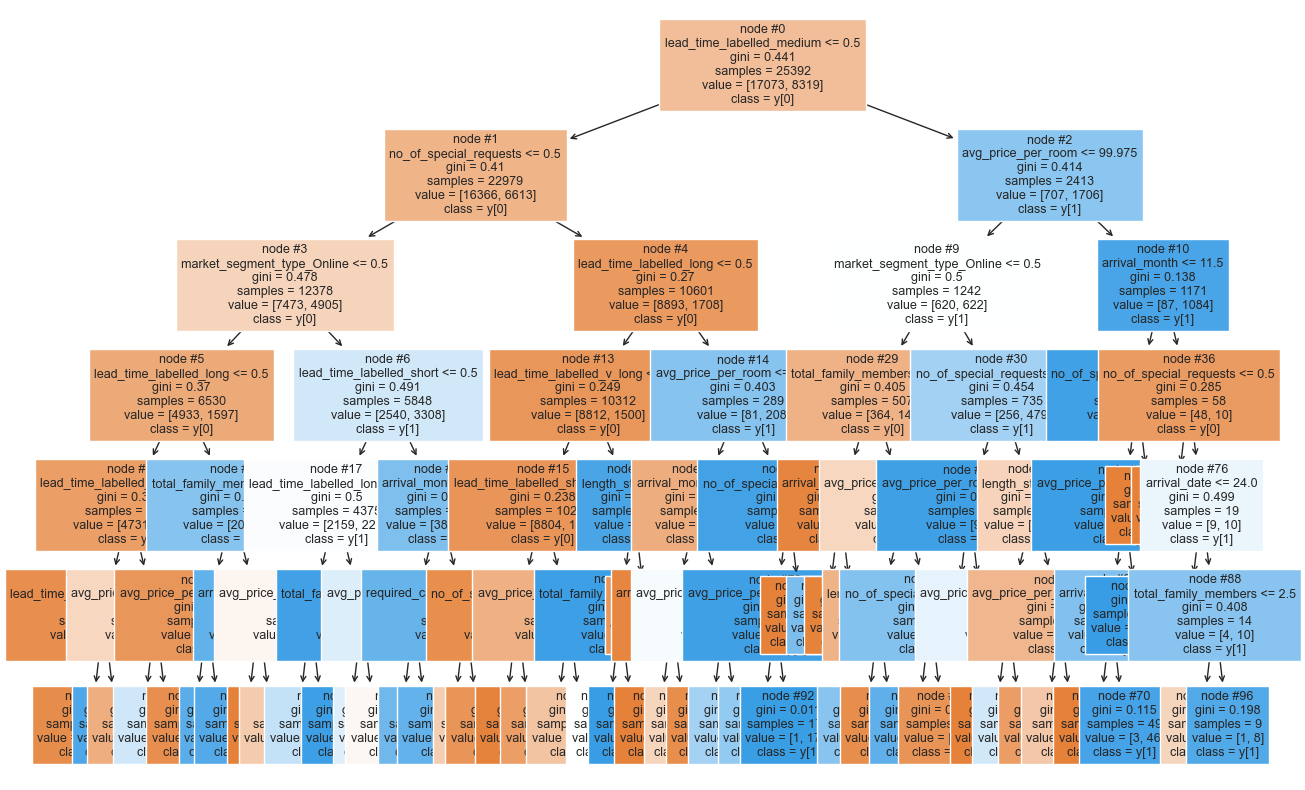

In [143]:
# Let's see the pre pruned tree
plt.figure(figsize=(15,10))

tree.plot_tree(estimator,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [142]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time_labelled_medium <= 0.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time_labelled_long <= 0.50
|   |   |   |   |--- lead_time_labelled_short <= 0.50
|   |   |   |   |   |--- lead_time_labelled_v_long <= 0.50
|   |   |   |   |   |   |--- weights: [3766.00, 362.00] class: 0
|   |   |   |   |   |--- lead_time_labelled_v_long >  0.50
|   |   |   |   |   |   |--- weights: [6.00, 60.00] class: 1
|   |   |   |   |--- lead_time_labelled_short >  0.50
|   |   |   |   |   |--- avg_price_per_room <= 94.25
|   |   |   |   |   |   |--- weights: [637.00, 228.00] class: 0
|   |   |   |   |   |--- avg_price_per_room >  94.25
|   |   |   |   |   |   |--- weights: [322.00, 425.00] class: 1
|   |   |   |--- lead_time_labelled_long >  0.50
|   |   |   |   |--- total_family_members <= 1.50
|   |   |   |   |   |--- avg_price_per_room <= 98.33
|   |   |   |   |   |   |--- weights: [99.00, 11.00] class: 0
|   |   |   |   |   |---

**Cost Complexity Pruning**

In [144]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [145]:
pd.DataFrame(path)

ccp_alphas  impurities
0        0.00000     0.01321
1        0.00000     0.01321
2        0.00000     0.01321
3        0.00000     0.01321
4        0.00000     0.01321
...          ...         ...
1740     0.00850     0.33729
1741     0.00857     0.34586
1742     0.01456     0.36042
1743     0.02496     0.41034
1744     0.03023     0.44057

[1745 rows x 2 columns]

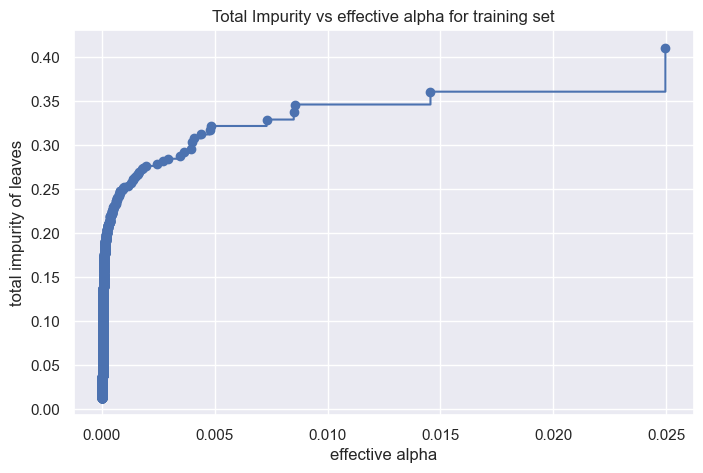

In [146]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [149]:
 clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 3 with ccp_alpha: 0.024962645746841816


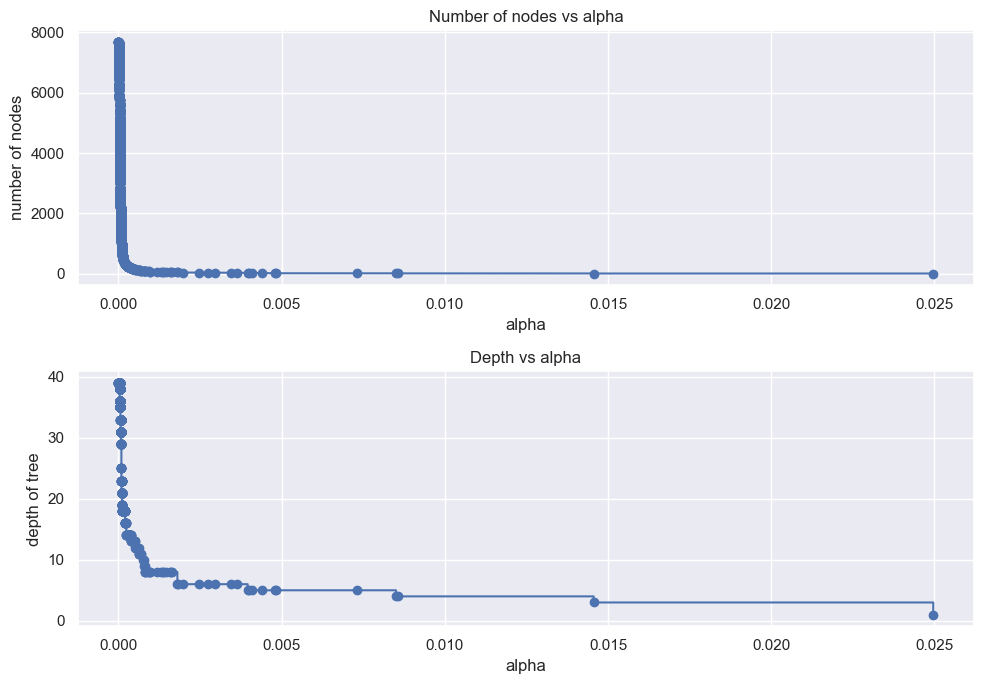

In [148]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

#### F1 Score vs alpha for training and testing sets

In [150]:
f1_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)

f1_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

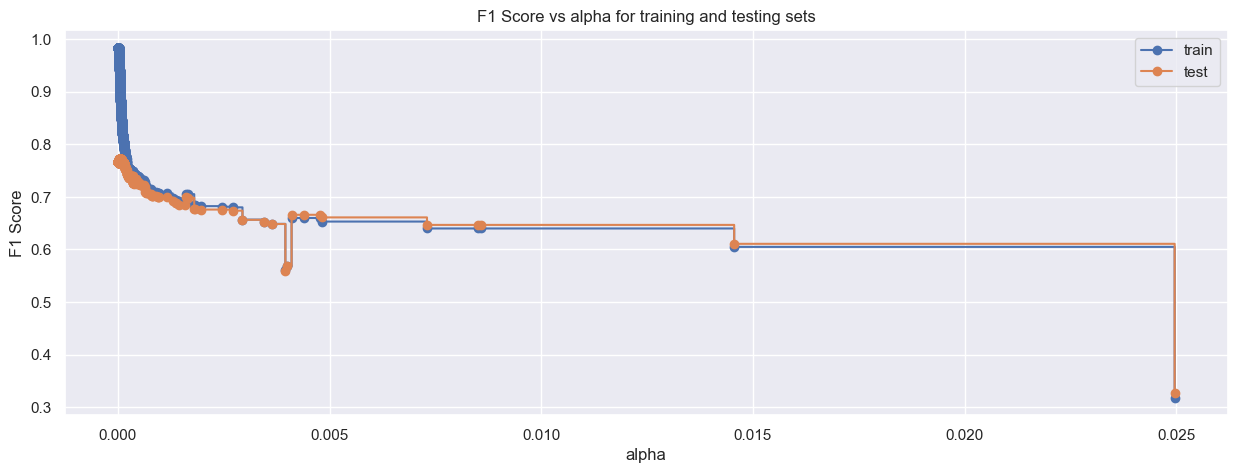

In [151]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 Score")
ax.set_title("F1 Score vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [152]:
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=7.191355045241396e-05, random_state=1)


#### Checking performance on training set

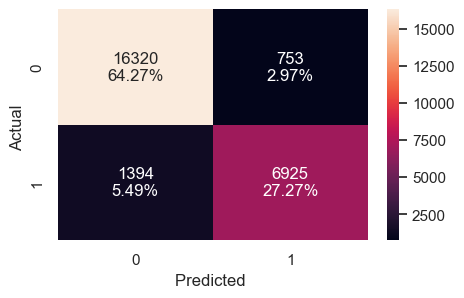

In [153]:
confusion_matrix_statsmodels(best_model, X_train, y_train)

In [154]:
decision_tree_ccp_train = model_performance_classification_statsmodels(
    best_model, X_train, y_train
)
decision_tree_ccp_train

Accuracy  Recall  Precision      F1
0   0.91545 0.83243    0.90193 0.86579

#### Checking model performance on test set

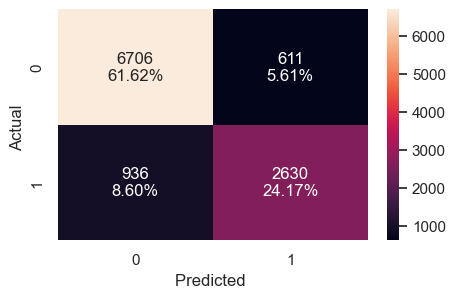

In [155]:
confusion_matrix_statsmodels(best_model, X_test, y_test)

In [156]:
decision_tree_ccp_test = model_performance_classification_statsmodels(
    best_model, X_test, y_test
)
decision_tree_ccp_test 

Accuracy  Recall  Precision      F1
0   0.85785 0.73752    0.81148 0.77273

In [157]:
decision_tree_ccp_train

Accuracy  Recall  Precision      F1
0   0.91545 0.83243    0.90193 0.86579

**Observations**:
    
1. This post pruned decision tree is not overfitting the training data and provide good fit for test data as well.
2. The accuracy is around .85 and recall is around .73 on the testing data
3. The important factor f1 for test data has improved to .77.

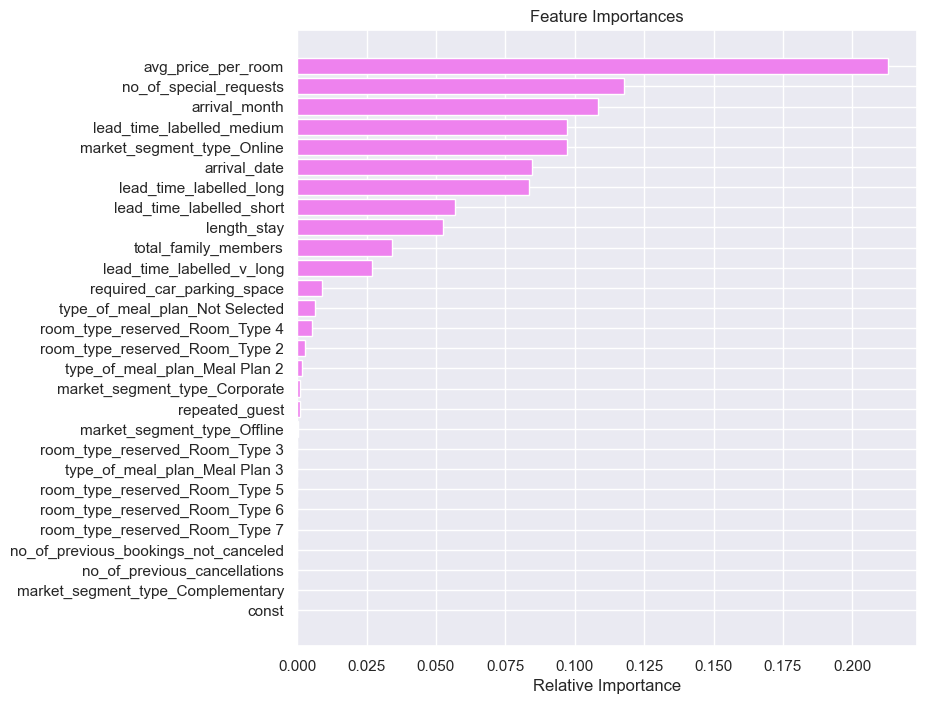

In [158]:
# Looking at the feature importances of this model
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

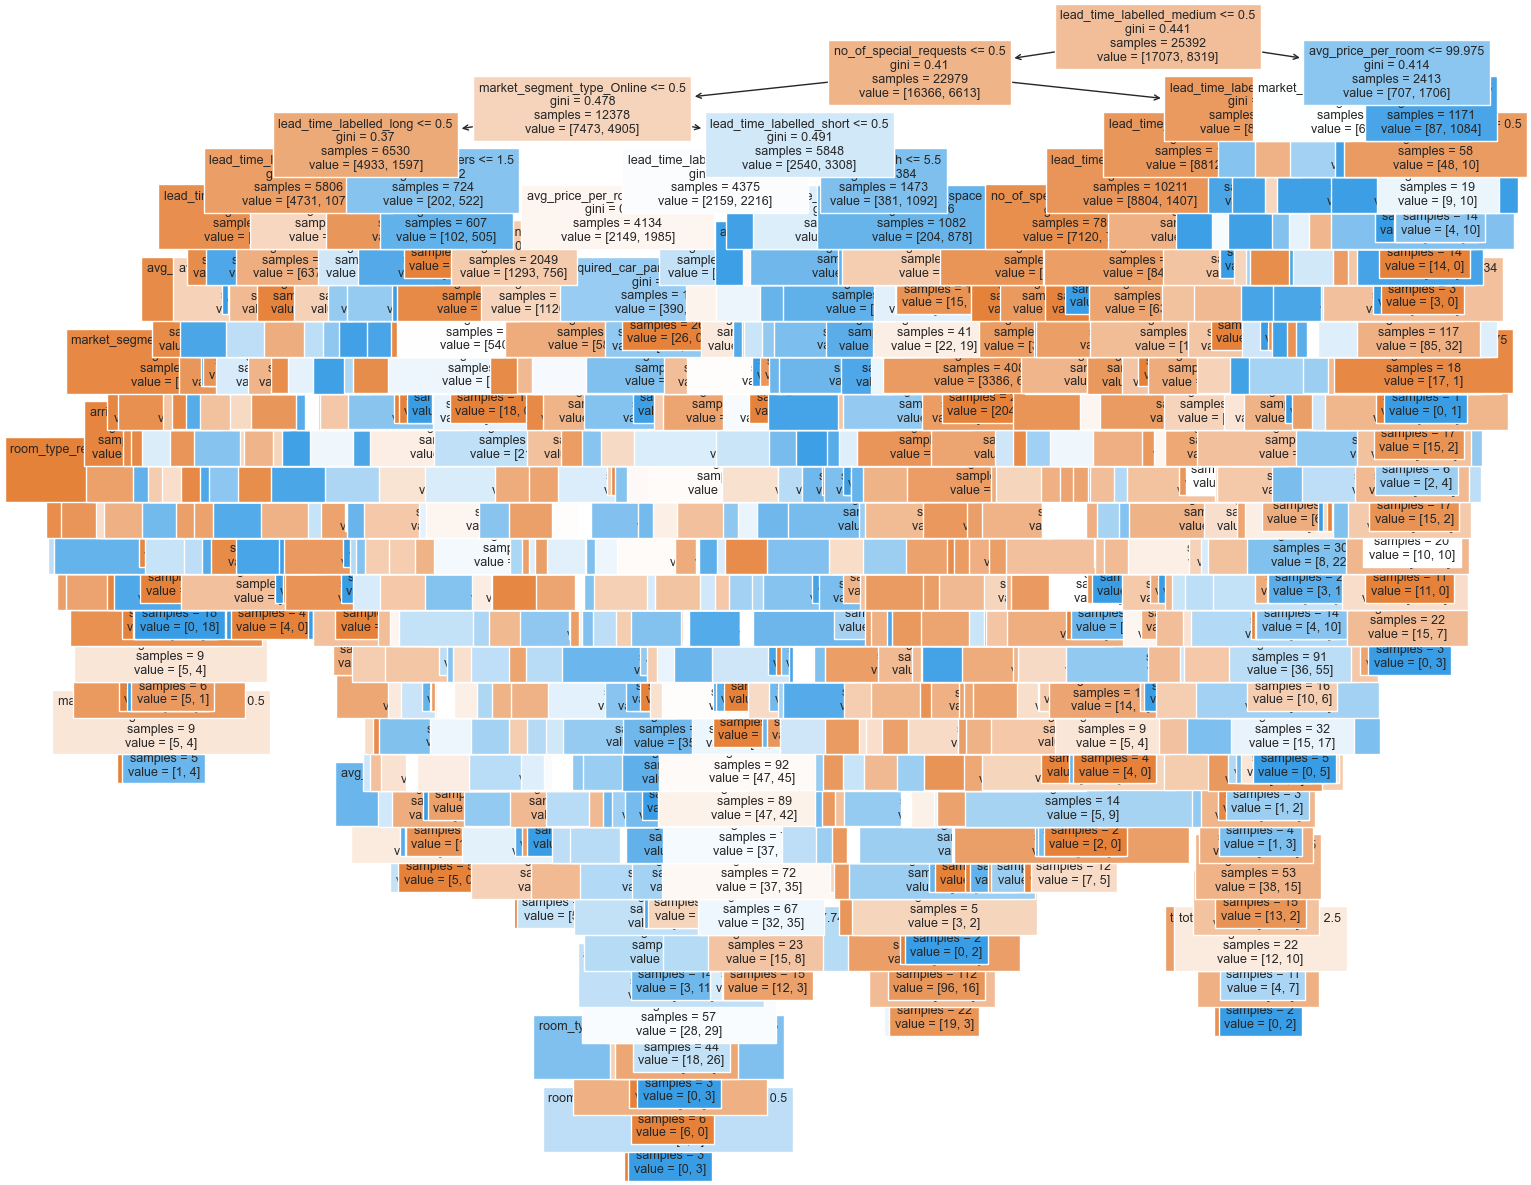

In [162]:
# plot the additional tree
plt.figure(figsize=(17,15))

tree.plot_tree(best_model,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=None)
plt.show()

In [163]:
# Text report showing the rules of a decision tree -
print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- lead_time_labelled_medium <= 0.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time_labelled_long <= 0.50
|   |   |   |   |--- lead_time_labelled_short <= 0.50
|   |   |   |   |   |--- lead_time_labelled_v_long <= 0.50
|   |   |   |   |   |   |--- length_stay <= 5.50
|   |   |   |   |   |   |   |--- avg_price_per_room <= 202.00
|   |   |   |   |   |   |   |   |--- arrival_date <= 24.50
|   |   |   |   |   |   |   |   |   |--- market_segment_type_Corporate <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- length_stay <= 3.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 10
|   |   |   |   |   |   |   |   |   |   |--- length_stay >  3.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 6
|   |   |   |   |   |   |   |   |   |--- market_segment_type_Corporate >  0.50
|   |   |   |   |   |   |   |   |   |   |--- total_family_members <= 1.50
|   |   |   |   |   |   

## Model Performance Comparison and Conclusions

In [159]:
#### Comparing models
# training performance comparison

models_train_comp_df = pd.concat(
    
    [
        log_reg_model_train_perf_threshold_auc_roc.T,
        decision_tree_perf_train.T,
        decision_tree_prune_train.T,
        decision_tree_ccp_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logic Regression",
   "Decision Tree original",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Logic Regression  Decision Tree original  \
Accuracy            0.75945                 0.98933   
Recall              0.75322                 0.97307   
Precision           0.60711                 0.99423   
F1                  0.67232                 0.98354   

           Decision Tree (Pre-Pruning)  Decision Tree (Post-Pruning)  
Accuracy                       0.81797                       0.91545  
Recall                         0.63661                       0.83243  
Precision                      0.76809                       0.90193  
F1                             0.69620                       0.86579

In [160]:
#### Comparing models
# training performance comparison

models_test_comp_df = pd.concat(
    
    [
        log_reg_model_test_perf_threshold_auc_roc.T,
        decision_tree_perf_test.T,
        decision_tree_prune_test.T,
        decision_tree_ccp_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logic Regression",
   "Decision Tree original",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


Logic Regression  Decision Tree original  \
Accuracy            0.75834                 0.84802   
Recall              0.75575                 0.76052   
Precision           0.60507                 0.77221   
F1                  0.67207                 0.76632   

           Decision Tree (Pre-Pruning)  Decision Tree (Post-Pruning)  
Accuracy                       0.81439                       0.85785  
Recall                         0.63068                       0.73752  
Precision                      0.76186                       0.81148  
F1                             0.69009                       0.77273

**Observations**:
    
1. The accuracy is quite high for testing dataset for all the compared models.
2. The recall is low for "Decision Tree (Pre-Pruning) model is at .63 and  high for rest of models.
3. The precision is low for logit regression model at .6 and highest of .811 for post pruned decision tree.
4. The f1 score is lowest for logit model at .67 and is highest for .77 for post pruned decision tree.
5. The decision tree post pruning is the best model which perfomed best on accuracy, precision, and F1.

## Actionable Insights and Recommendations

- What profitable policies for cancellations and refunds can the hotel adopt?
- What other recommedations would you suggest to the hotel?